![alttext](https://github.com/UrbsLab/STREAMLINE/blob/main/docs/source/pictures/STREAMLINE_Logo_Full.png?raw=true)


# Jupyter Notebook README

STREAMLINE is an end-to-end automated machine learning (AutoML) pipeline that empowers anyone to easily run, interpret, and apply a rigorous and customizable analysis for data mining or predictive modeling. Currently limited to binary classification in tabular data.

* This notebook runs all phases of STREAMLINE. We recommend users review the STREAMLINE documentation for details.

## Prerequisites
* This notebook should be located in the root folder of STREAMLINE (i.e. `/STREAMLINE/STREAMLINE-Notebook.ipynb`) after downloading from GitHub as indicated in the installation instructions in the documentation. It is meant to be run from within this STREAMLINE folder. We recommend always downloading the most recent version of STREAMLINE.
* Make sure that prerequisite packages have been installed before running including git, anaconda, and other required packages obtained by running `pip install -r requirements.txt` (see installation instructions).


## What to expect running this notebook 'as-is'?
* This notebook has been initially set up to run 'as-is' on two 'demo' datasets: (1) `hcc_data.csv`: the original HCC dataset downloaded from the UCI repository and (2) `hcc_data_custom.csv`: a 'custom' datasets which removes the two covariate features from the HCC dataset, and adds simulated features and instances to it to explicitly test aspects of data preprocessing (i.e. cleaning and feature engineering). 

* After model training and testing evaluations are complete, the models trained from hcc-data_example_custom.csv are applied to a 'replication' dataset (`hcc_data_custom_rep.csv`) for another round of evaluations. Since no true replication data was available for this example, we simulated a replication dataset by taking the `hcc_data_custom.csv` data and randomly resampling feature values for 30% of instances in the data to add some noise/variation to it.

* Notebook run parameters have initially been set up to run only three of the available modeling algorithms (logistic regression, decision tree, and naive bayes), with 3-fold CV so that it runs completely in about 2-3 minutes (tested on a 3.49 GHz 16-core PC with 64GB RAM).

* As the notebook run completes, the output 'experiment' folder including all output files will automatically be saved to `/STREAMLINE/DemoOutput` including the PDF summary reports.

## Run Instructions for this Notebook
* **Demo Run:**
    * Leave all run parameter cells (below) unchanged and choose `Restart and RunAll` under the `Kernal` tab in Jupyter Notebook
    * You can optionally change non-essential run parameters in the code-cells below to run the demo with different settings

* **Custom Dataset Run:** 
    * Set (`demo_run = False`)
    * Adjust all essential run parameters based on dataset location/characteristics, as well as the desired output folder location and experiment folder name.
    * Adjust all non-essential run parameters to desired settings within notebook code-cells
    * Choose `Restart and RunAll` under the `Kernal` tab in Jupyter Notebook
* *Before running the STREAMLINE notebook again we generally recommend selecting `Disconnect and delete runtime` under `Runtime` tab in Jupyter Notebook*

----------------------
# STREAMLINE RUN PARAMETERS
----------------------
## Essential Run Parameters
* Run parameters under 'Notebook', 'Target Data', and 'Replication Data' are typically necessary to adjust in order to run STREAMLINE new (non-demo) data

* Additional run parameters below these sections can also be optionally updated to change how STREAMLINE runs, e.g. how many CV partitions to make, or how many modeling algorithms to apply

### Notebook - Run Parameters
The first parameter below is specific to this Jupypter Notebook.

In [1]:
demo_run = True # leave (True) to run the demo datasets, make (False) to manually update essential run parameters below to run on other datasets

### Target Data - Run Parameters (Phase 1)
* No need to edit unless (`demo_run = False`)
* Update these parameters to run STREAMLINE on a different folder of datasets. Any folder of datasets to be analyzed should include one or more datasets saved as `.txt`, `.csv` or `.tsv` files. See documentation for dataset formatting requirements.

* All datasets should have the same header names for the class, instance, and match labels (note instance and match labels are optional)
* When specifying features to be treated as categorical vs. quantitative:
  * If these lists are left empty, STREAMLINE will assign feature type based on the `categorical_cutoff`(under 'General Run Parameters'). I.e. features with more than `categorical_cutoff` unique values will be treated as quanatiative
  * Any binary features need not be specified as they will be assigned as categorical by default
  * User can specify either just categorical or quanatiative feature names, and all other unspecified non-binary features will be assigned to the other feature type by default 

In [2]:
if not demo_run: # Leave this command as is.

    # Folder path to the folder containing dataset(s) to be analyzed (must include one or more .txt, .tsv, or .csv datasets)
    data_path = "./UserData" # (str) data folder path

    # Folder path: where to save pipeline outputs (must be updated for a given user)
    output_path = './UserOutput' # (str) ouput folder path (folder will be created by STREAMLINE automatically)

    # Unique experiment name - folder created for this analysis within output folder path
    experiment_name = 'my_experiment'  # (str) experiment name (change to save a new STREAMLINE run output folder instead of overwriting previous run)

    # Data Labels
    class_label = 'Class' # (str) i.e. class outcome column name
    instance_label = 'InstanceID' # (str) if data includes instance labels, given respective column name here, otherwise put 'None'
    match_label = None # (str or None) only applies when M selected for partition-method; indicates column name including matched instance ids'

    # Option to manually specify feature names to leave out of analysis, or which to treat as categorical vs. quantitative (without using built in variable type detector)
    ignore_features = None # (list of str values or None) list of column names (given as string values) to exclude from the analysis (only insert column names if needed, otherwise specify 'None')
    categorical_feature_headers = None # (list of str values or None) specify 'None' for 'auto-detect' otherwise list feature names (given as string values) to be treated as categorical.
    quantitiative_feature_headers = None # (list of str values or None) specify 'None' for 'auto-detect' otherwise list feature names (given as string values) to be treated as quantitative.

### Replication Data - Run Parameters (Phase 8)
* Don't edit unless (`demo_run = False`)

* Update these parameters to run STREAMLINE's 'replication' phase where all models trained in the earlier phases are evaluated on the same hold-out replication data (recommended when available)

* Multiple replication datasets (e.g. data collected from different sites) can be included in the replication data folder and STREAMLINE will apply replication analyses to each individually

In [3]:
if not demo_run: # Leave this command as is.

   # Turns the replication data analysis phase on or off
    applyToReplication = True # (bool, True or False) leave false unless you have one or more replication datasets to further evaluate/compare all models in uniform manner
    
    # Folder path to the folder containing the replication dataset(s) to be evaluated using previously trained models for a specific target dataset (.txt, .tsv, or .csv datasets))
    rep_data_path = "./UserRepData" # (txt) data folder path for replication Dataset(s)
    
    # File path to one of the individual datasets used to train models within STREAMLINE
    dataset_for_rep = "./UserData/user_data_rep.csv" # (txt) path and name of an individual dataset used to generate the models being evaluated with replication data

--------------
## Non-Essential Run Parameters
### General - Run Parameters (Phase 1)
* Optionally update these general parameters used throughout all/most phases of the pipeline

In [4]:
# Cross Validation (CV)
n_splits = 3  # (int, > 1) number of training/testing data partitions to create - and resulting number of models generated using each ML algorithm
partition_method = 'Stratified' # (str) with options; Stratified, Random, or Group

# Cutoffs
categorical_cutoff = 10 # (int) number of unique values after which a variable is considered to be quantitative vs categorical if categorical_features_headers or quantitative_feature_headers not specified.
sig_cutoff = 0.05 # (float, 0-1) significance cutoff used throughout pipeline

# Set Random Seed for Reproducible Analysis
random_state = 42 # (int) sets a specific random seed for reproducible results

### Data Processing - Run Parameters (Phase 1)
* Optionally, update these parameters to decide what analyses are run and outputs are produced by STREAMLINE in the exploratory analysis phase

In [5]:
# EDA outpute file controls (None, outputs all files)
exclude_eda_output = None # (None, or a list of 'str' values) with possible exclusions: ['describe','univariate_plots','correlation_plots']
top_uni_features = 20 # (int) number of top significant features to report in notebook for univariate analysis

# Data processing parameters (cleaning and feature engineering)
featureeng_missingness = 0.5 # (float, 0-1) proportion of missing values above which categorical feature encoding missingness is generated
cleaning_missingness = 0.5 # (float, 0-1) proportion of missing values at which instance and feature removal is performed
correlation_removal_threshold = 1 # (float, 0-1) feature correlation at which one out of a pair of features is randomly removed

### Scaling and Imputing - Run Parameters (Phase 2)
* Optionally update these parameters to turn specific data preprocessing options on or off

In [6]:
# Data Transformation (i.e. scaling) - important for running and interpreting built-in feature importance estimates for certain ML modeling algorithms
scale_data = True # (bool, True or False) perform data scaling (recommended True)

# Missing Data Imputation Options
impute_data = True # (bool, True or False) perform missing value data imputation (required for most ML algorithms if missing data is present)
multi_impute = True # (bool, True or False) apply multivariate imputation to quantitative features, otherwise uses mean imputation

# When False, optionally keep the intermediary CV files generated in Phase 1, otherwise overwrite them with new scaled/imputed ones
overwrite_cv = False # (bool, True or False) 

### Feature Importance Estimation - Run Parameters (Phase 3)
* Optionally update these parameters to decide which filter-based feature importance estimation algorithms to apply (currently only mutual information and MultiSURF are options)

In [7]:
# Available Filter-based Feature Importance/Selection Algorithms
do_mutual_info = True # (bool, True or False) do mutual information analysis
do_multisurf = True # (bool, True or False) do multiSURF analysis

# Additional MultiSURF Options
use_TURF = False # (bool, True or False) use TURF wrapper around MultiSURF (recommended for datasets with >10,000 features)
TURF_pct = 0.5 # (float, 0.01-0.5) proportion of instances removed in an iteration (also dictates number of iterations as 1/TURF_pct)
instance_subset = 2000 # (int) sample subset size to use with MultiSURF (since MultiSURF's compute time scales quadratically with instance count)
njobs = -1 # (int) number of cores dedicated to running algorithm; setting to -1 will use all available cores when run locally

### Feature Selection - Run Parameters (Phase 4)
* Optionally update these parameters to control how 'collective' feature selection is conducted prior to modeling.

  * When `filter_poor_features = False`, all features will be used in the modeling phase.

  * When `filter_poor_features = True`:
    * And `max_features_to_keep = None`, all features with a score <= 0 from all active feature importance algorithm will be removed, but the rest kept.

    * And `max_features_to_keep = n` (where n is a 'value' less than the total number of features in the dataset), first all features with a score <= 0 from all active feature importance algorithm will be removed, then the top n scoring (non-redundant) features from each algorithm will be kept.

In [8]:
# Turn feature selection on or off
filter_poor_features = True # (bool, True or False) filter out features with no indication of being informative prior to modeling

# Control maximum number of features to keep out of total features in dataset.
max_features_to_keep = 2000 # (int or None) maximum features to keep. 'None' if no max

# Controls the feature importance estimation plots generation
top_fi_features = 40 # (int) number of top scoring features to illustrate in feature importance figures
export_scores = True # (bool, True or False) export figure summarizing average feature importance scores over cv partitions

# When False, optionally keep the intermediary CV files generated in Phase 2, otherwise overwrite them with new feature selected ones
overwrite_cv_feat = False # (bool, True or False)

### Modeling - Run Parameters (Phase 5)
* Optionally update these parameters to control what modeling algorithms are run, as well as other options relevant to the modeling phase. The 16 Classification algorithms currently available in STREAMLINE include:

  * Naive Bayes (NB)
  * Logistic Regression (LR)
  * Elastic Net (EN)
  * Decision Tree (DT)
  * Random Forest (RF)
  * Gradient Boosting (GB)
  * Extreame Gradient Boosting (XGB)
  * Light Gradient Boosting (LGB)
  * Category Gradient Boosting (CGB)
  * Support Vector Machines (SVM)
  * Artificial Neural Networks (ANN)
  * K-Nearest Neighbors (KNN)
  * Genetic Programming, i.e. symbolic classification (GP)
  * Educational Learning Classifier System (eLCS)
  * 'X' Classifier System (XCS)
  * Extended Supervised Tracking Classifier System (ExSTraCS)

The last 3 algorithms above are rule-based ML approaches implemented by our research group. eLCS and XCS are under active development so they have been turned off when using default settings.


In [9]:
# Machine Learning Algorithms to Run (Setting 'algorithms' to 'None' rather than a list will run all algorithms except those specified in 'exclude')
algorithms = ["NB", "LR", "DT"] # (list of strings or None) options: ["NB","LR","EN","DT","RF","GB","XGB","LGB","CGB","SVM","ANN","KNN","GP","eLCS","XCS","ExSTraCS"]

# ML Model Algorithm to exclude (no need to fill out if 'algorithms' are specified)
exclude = ['eLCS', 'XCS'] # (list of strings or None) options: ["NB","LR","EN","DT","RF","GB","XGB","LGB","CGB","SVM","ANN","KNN","GP","eLCS","XCS","ExSTraCS"]

# Other Analysis Parameters
training_subsample = 0  # (int) for long running algorithms, option to subsample training set (0 for no subsample) to limit the sample size used to train algorithms that do not scale up well in large instance spaces (i.e. XGB,SVM,KN,ANN,and LR) and depending on 'instances' settings, ExSTraCS, eLCS, and XCS)
use_uniform_FI = True # (bool, True or False) overides use of any available feature importances estimate methods from models, instead using permutation_importance uniformly
primary_metric = 'balanced_accuracy' # (str) metric used to optimize hyperparameters: must be an available metric identifier from (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
metric_direction = 'maximize' # (str) options 'maximize' or 'minimize': must be selected appropriately for the chosen primary metric (generally maximize)

# Hyperparameter Sweep Options
n_trials = 200   # (int) number of bayesian hyperparameter optimization trials using Optuna
timeout = 900    # (int or None) seconds until hyperparameter sweep stops running new trials (Note: it may run longer to finish last trial started): must be set to None to ensure STREAMLINE reproducibility
export_hyper_sweep_plots = True # (bool, True or False) export hyperparameter sweep plots generated with Optuna

# Learning classifier system algorithm options (ExSTraCS, eLCS, XCS)
do_lcs_sweep = False # (bool, True or False) do LCS hyperparameter tuning otherwise use specified hyperparameter settings below (we recommend leaving this False, as it can take a long time to run)
lcs_nu = 1                 # (int, 0-10) specify LCS nu parameter (higher values place more pressure to generate accurate rules, but easily leads to overfitting in noisy problems)
lcs_iterations = 200000    # (int, > training data instance count) specify the number of LCS learning iterations to conduct
lcs_N = 2000               # (int) > 500) specify the maximum rule population size for the LCS algorithm
lcs_timeout = 1200         # (int) seconds until hyperparameter sweep stops for LCS algorithms (note: evolutionary algorithms often require more time for a single run)

### Post-Analysis - Run Parameters (Phase 6)
* Optionally update these parameters to control aspects of model evaluation figure generation. Note that all STREAMLINE performance metric evaluations and figures are generated with respect to the hold out testing data in this phase.

In [10]:
# Post-analysis output file controls 
exclude_plots = None # (None, or a list of 'str' values) with possible exclusions: ['plot_ROC', 'plot_PRC', 'plot_FI_box', 'plot_metric_boxplots']
top_model_fi_features = 40  # (int) number of top features in model to illustrate in feature importance figures
metric_weight = 'balanced_accuracy' # (str, balanced_accuracy or roc_auc) ML model metric used as weight in composite FI plots (only supports balanced_accuracy or roc_auc as options): recommend setting the same as primary_metric if possible

### Replication - Run Parameters (Phase 8)
* Optionally update these parameters if you're running replication phase to exclude plots 

In [11]:
# Replication output file controls 
exclude_rep_plots = None # (None, outputs all files) with possible exlusions ['plot_ROC', 'plot_PRC', 'plot_metric_boxplots','feature_correlations']

### Cleanup - Run Parameters
* Optionally update these parameters to delete temporary files in output folder (generally recommended to leave these as `True`)

In [12]:
del_time = False  # (bool, True or False) delete individual run-time files (but save summary)
del_old_cv = False # (bool, True or False) delete any of the older versions of CV training and testing datasets if overwrite_cv was set to False

-------------

# Most Users - We recommend you do not make code edits below this cell.

--------------

# DEMO DATA ANALYSIS SETUP 


### Demo Data Run Parameters:
* Set up for Demo Run (never edit the code cell below)


In [13]:
if demo_run: # Leave this command as is.

    # Folder path to the folder containing dataset(s) to be analyzed (must include one or more .txt, .tsv, or .csv datasets)
    data_path = "./data/DemoData" # (str) data folder path

    # Output foder path: where to save pipeline outputs (must be updated for a given user)
    output_path = './DemoOutput' # (str) ouput folder path (folder will be created by STREAMLINE automatically)

    # Unique experiment name - folder created for this analysis within output folder path
    experiment_name = 'demo_experiment'  # (str) experiment name (change to save a new STREAMLINE run output folder instead of overwriting previous run)

    # Data Labels
    class_label = 'Class' # (str) i.e. class outcome column name
    instance_label = 'InstanceID' # (str) If data includes instance labels, given respective column name here, otherwise put 'None'
    match_label = None # (str or None) only applies when M selected for partition-method; indicates column name including matched instance ids'

    # Option to manually specify feature names to leave out of analysis
    ignore_features = None # list of column names (given as string values) to exclude from the analysis (only insert column names if needed, otherwise leave empty)

    # Recommended option to manually specify what features to treat as categorical: None for 'auto-detect', otherwise list feature names (given as string values) to be treated as categorical
    categorical_feature_headers = ['Gender','Symptoms','Alcohol','Hepatitis B Surface Antigen','Hepatitis B e Antigen','Hepatitis B Core Antibody','Hepatitis C Virus Antibody','Cirrhosis',
                                   'Endemic Countries','Smoking','Diabetes','Obesity','Hemochromatosis','Arterial Hypertension','Chronic Renal Insufficiency','Human Immunodeficiency Virus',
                                   'Nonalcoholic Steatohepatitis','Esophageal Varices','Splenomegaly','Portal Hypertension','Portal Vein Thrombosis','Liver Metastasis','Radiological Hallmark',
                                   'Sim_Cat_2','Sim_Cat_3','Sim_Cat_4','Sim_Text_Cat_2','Sim_Text_Cat_3','Sim_Text_Cat_4']

    # Recommended option to manually specify what features to treat as quantitative: None for 'auto-detect', otherwise list feature names (given as string values) to be treated as quantitative
    quantitiative_feature_headers = ['Age at diagnosis','Grams of Alcohol per day','Packs of cigarets per year', 'Performance Status*', 'Encephalopathy degree*','Ascites degree*',
                                      'International Normalised Ratio*','Alpha-Fetoprotein (ng/mL)','Haemoglobin (g/dL)','Mean Corpuscular Volume', 'Leukocytes(G/L)',
                                      'Platelets','Albumin (mg/dL)','Total Bilirubin(mg/dL)','Alanine transaminase (U/L)','Aspartate transaminase (U/L)','Gamma glutamyl transferase (U/L)',
                                      'Alkaline phosphatase (U/L)', 'Total Proteins (g/dL)', 'Creatinine (mg/dL)','Number of Nodules','Major dimension of nodule (cm)','Direct Bilirubin (mg/dL)',
                                      'Iron','Oxygen Saturation (%)','Ferritin (ng/mL)','Sim_Miss_0.6','Sim_Miss_0.7','Sim_Cor_-1.0_A','Sim_Cor_-1.0_B','Sim_Cor_0.9_A', 'Sim_Cor_0.9_B',
                                      'Sim_Cor_1.0_A','Sim_Cor_1.0_B']

    # Turns the replication data analysis phase on or off
    applyToReplication = True # (bool, True or False) leave false unless you have a replication dataset handy to further evaluate/compare all models in uniform manner

    # Folder path to the folder containing the replication dataset(s) to be evaluated using previously trained models (.txt, .tsv, or .csv datasets))
    rep_data_path = "./data/DemoRepData" # (txt) name of folder with replication dataset(s)

    # File path to one of the individual datasets used to train models within STREAMLINE
    dataset_for_rep = "./data/DemoData/hcc_data_custom.csv" # (txt) path and name of an individual dataset used to generate the models being evaluated with replication data

-------------

# STREAMLINE RUN CODE


## Notebook Housekeeping
* Sets up notebook cells to display internal process

* Use `logging.INFO` for higher level output, `logging.WARNING` for only critical information. Comment to hide all text output.

* You can use `run_parallel = True` for phases other than modeling, but the advantage is not significant vs the overhead for small jobs

In [14]:
import logging
FORMAT = '%(levelname)s: %(message)s'
logging.basicConfig(format=FORMAT)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

* Housekeeping code allowing notebook to be run again with the same settings, overwriting a previously run experiment with the same name
  * Comment out code cell below to avoid this behavior

In [15]:
import os
import shutil
if os.path.exists(output_path+'/'+experiment_name):
    shutil.rmtree(output_path+'/'+experiment_name)

## STREAMLINE Workflow
* The code below runs through the analysis phases of STREAMLINE

## Phase 1: EDA and Data Processing
After cell runs, for each target dataset you will see:
* An initial EDA data counts summary
* Notification of features removed (during cleaning) or added (during feature engineering)
* A processed EDA data counts summary
* Class balance barplot
* Feature correlation heatmap
* Top univariate analysis results

INFO: NumExpr defaulting to 8 threads.
INFO: ------------------------------------------------------- 
INFO: Loading Dataset: hcc_data_custom
INFO: Validating and Identifying Feature Types...
INFO: Running Initial EDA:
INFO: Initial Data Counts: ----------------
INFO: Instance Count = 169
INFO: Feature Count = 61
INFO:     Categorical  = 28
INFO:     Quantitative = 33
INFO: Missing Count = 1138
INFO:     Missing Percent = 0.11038898050247356
INFO: Class Counts: ----------------
INFO: Class Count Information
INFO: 
   Class  Instances
0    0.0        104
1    1.0         63
INFO: Ordinal encoding the following features:
INFO: 	Sim_Text_Cat_2
INFO: Running Feature Engineering
INFO: Engineering the following Features for missingness:
INFO: 	 Missing_Sim_Miss_0.6
INFO: 	 Missing_Sim_Miss_0.7
INFO: Removing the following Features due to Missingness:
INFO: 	Sim_Miss_0.6
INFO: 	Sim_Miss_0.7
INFO: One-hot encoding the following features:
INFO: 	Sim_Cat_3
INFO: 	Sim_Cat_4
INFO: 	Sim_Text_Cat_3
I

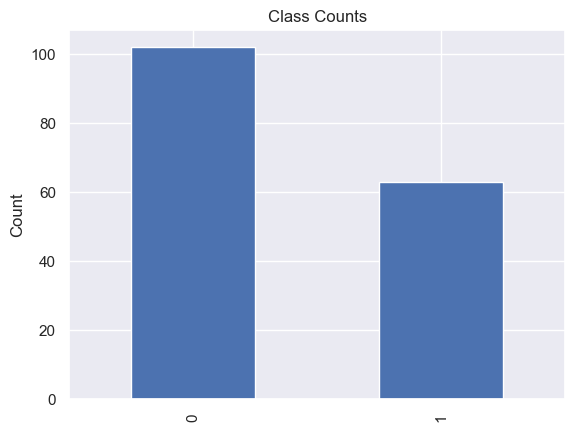

INFO: Generating Feature Correlation Heatmap...


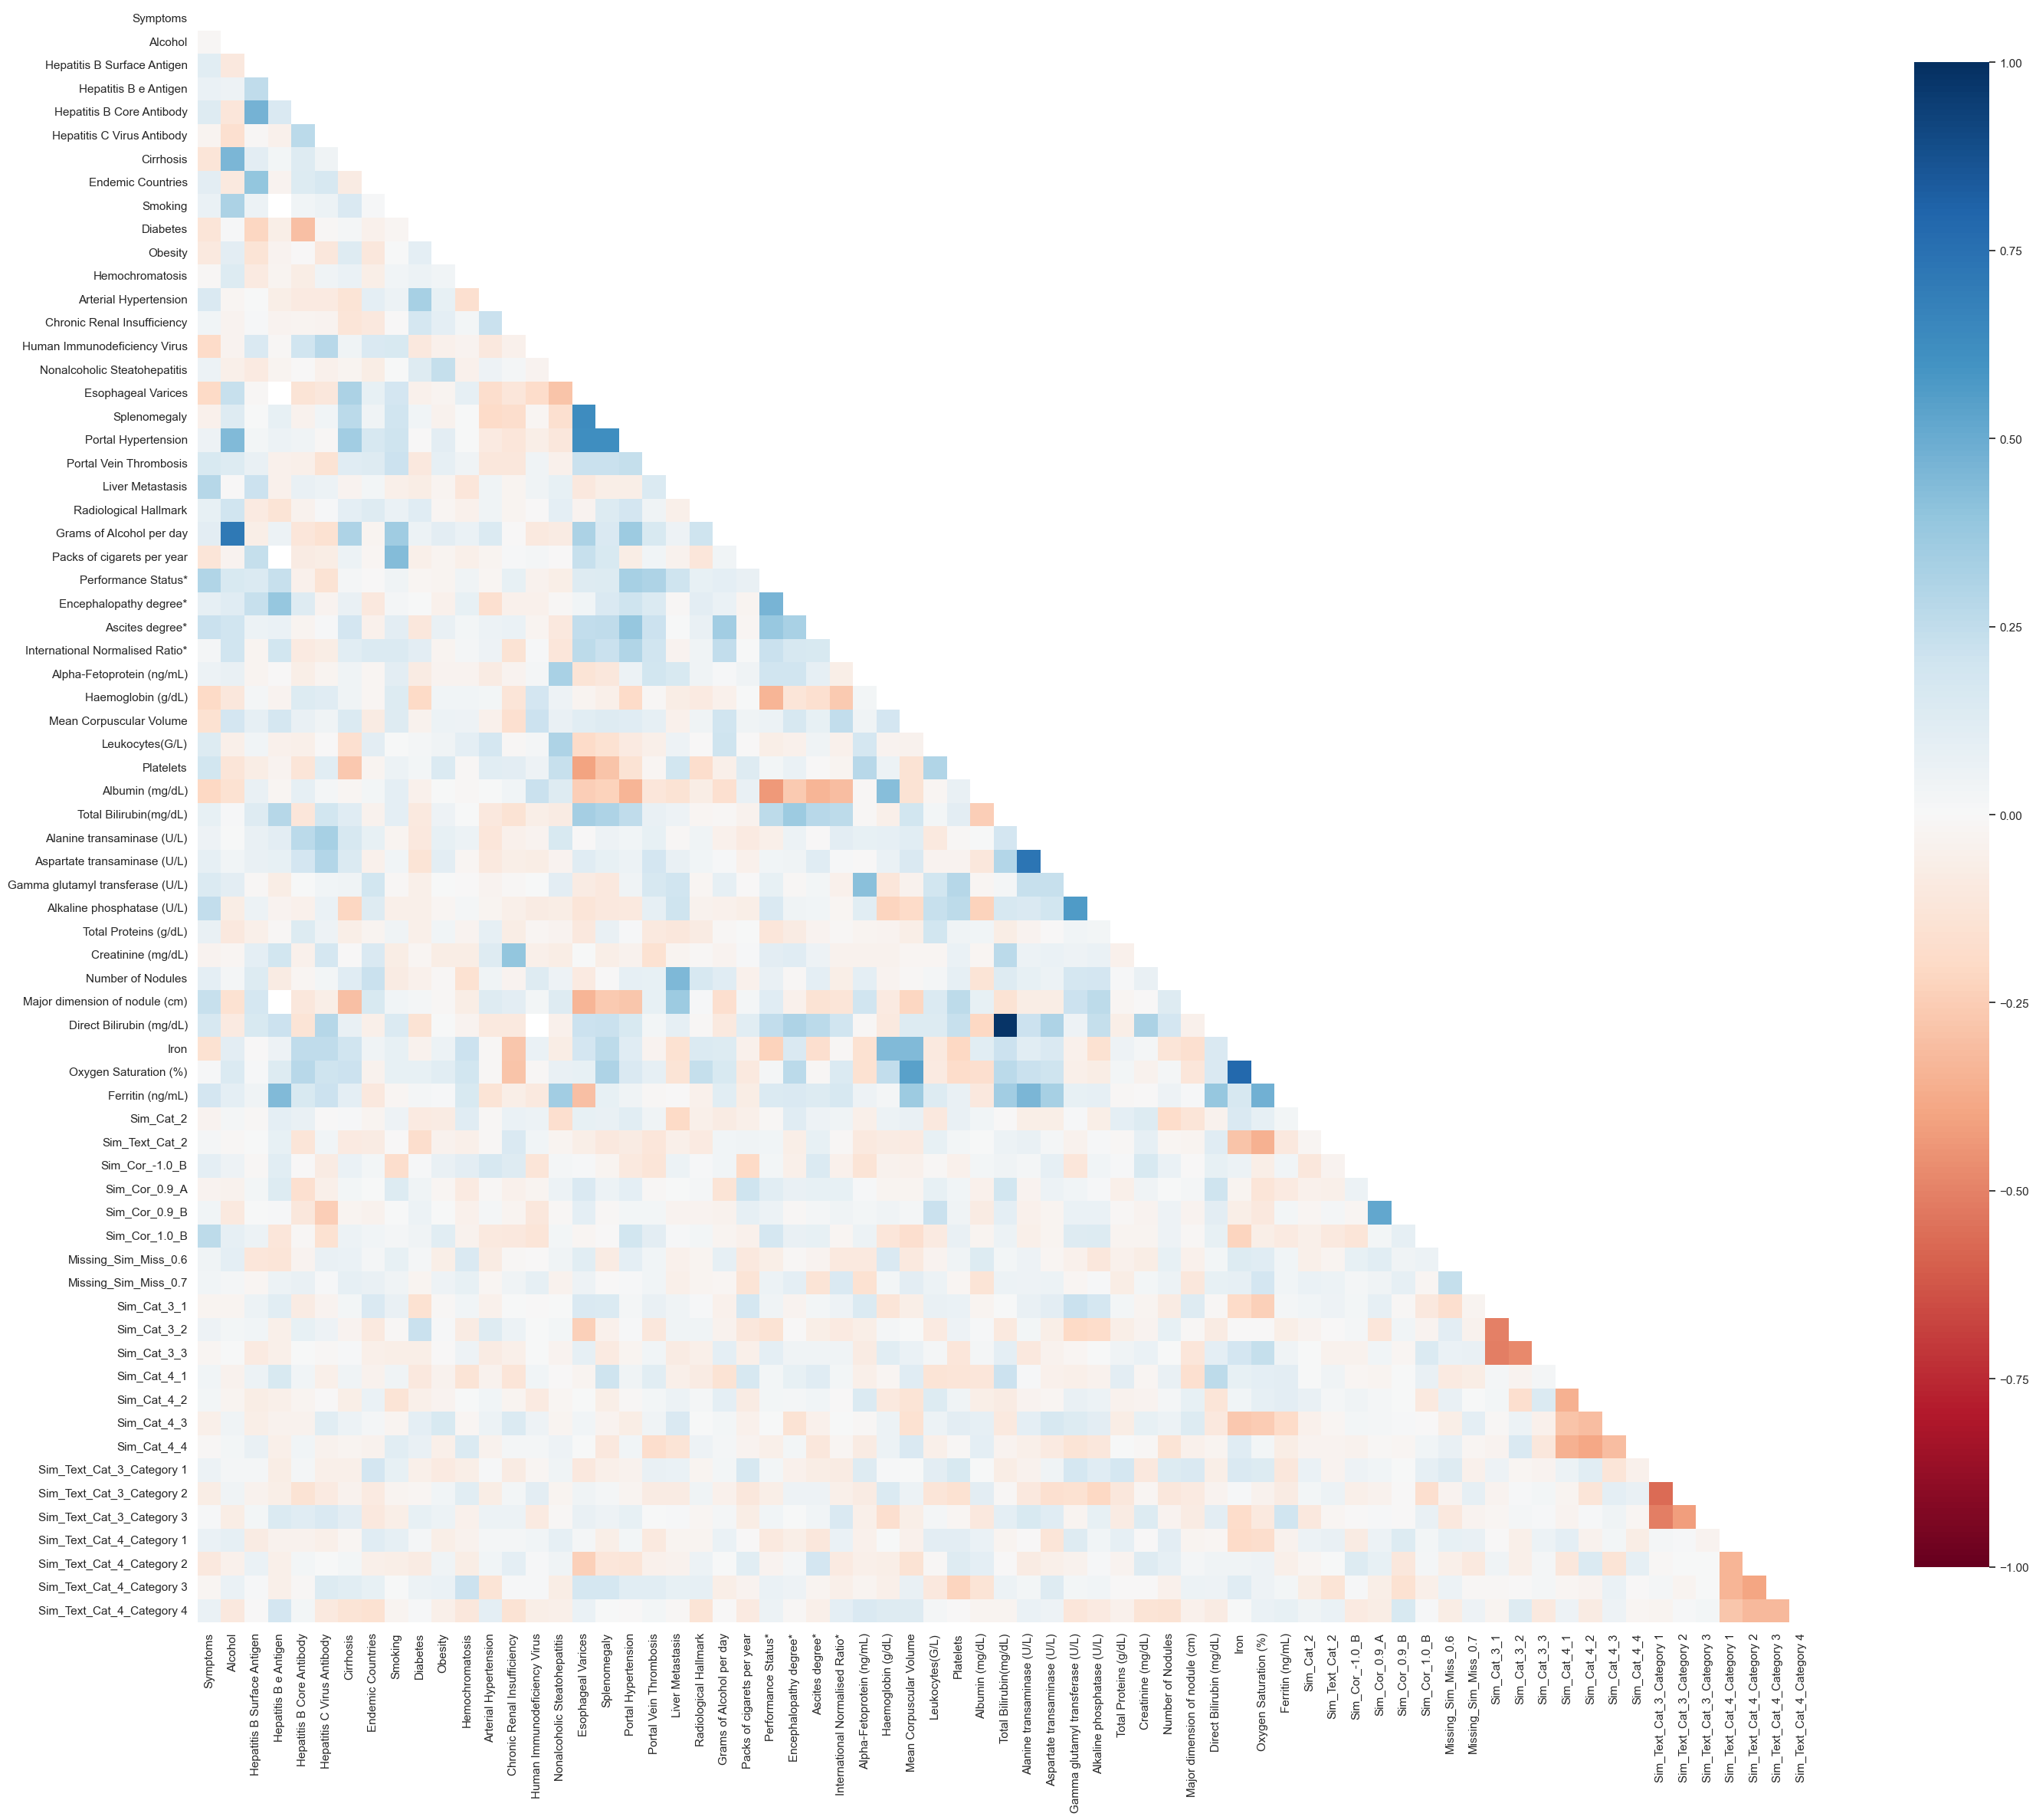

INFO: Running Univariate Analyses...
INFO: Plotting top significant 20 features.
INFO: ###################################################
INFO: Significant Univariate Associations:
INFO: Alkaline phosphatase (U/L): (p-val = 8.425494437393163e-07)
INFO: Performance Status*: (p-val = 1.8787043290235831e-06)
INFO: Alpha-Fetoprotein (ng/mL): (p-val = 3.7632257667465082e-06)
INFO: Haemoglobin (g/dL): (p-val = 6.806983230077955e-05)
INFO: Albumin (mg/dL): (p-val = 0.0002097286566980117)
INFO: Symptoms: (p-val = 0.0006092985105592953)
INFO: Ascites degree*: (p-val = 0.0010580963945994142)
INFO: Direct Bilirubin (mg/dL): (p-val = 0.0013544764761447027)
INFO: Aspartate transaminase (U/L): (p-val = 0.0016188344745582482)
INFO: Ferritin (ng/mL): (p-val = 0.0019988859548087426)
INFO: Liver Metastasis: (p-val = 0.002993588224869906)
INFO: Iron: (p-val = 0.009131914019954513)
INFO: Portal Vein Thrombosis: (p-val = 0.01174304115542567)
INFO: Gamma glutamyl transferase (U/L): (p-val = 0.0191207685779

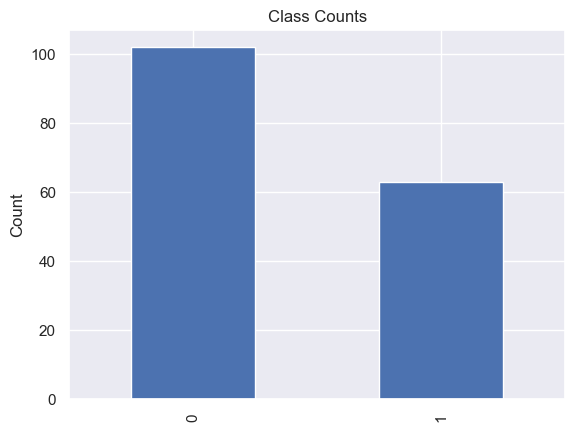

INFO: Generating Feature Correlation Heatmap...


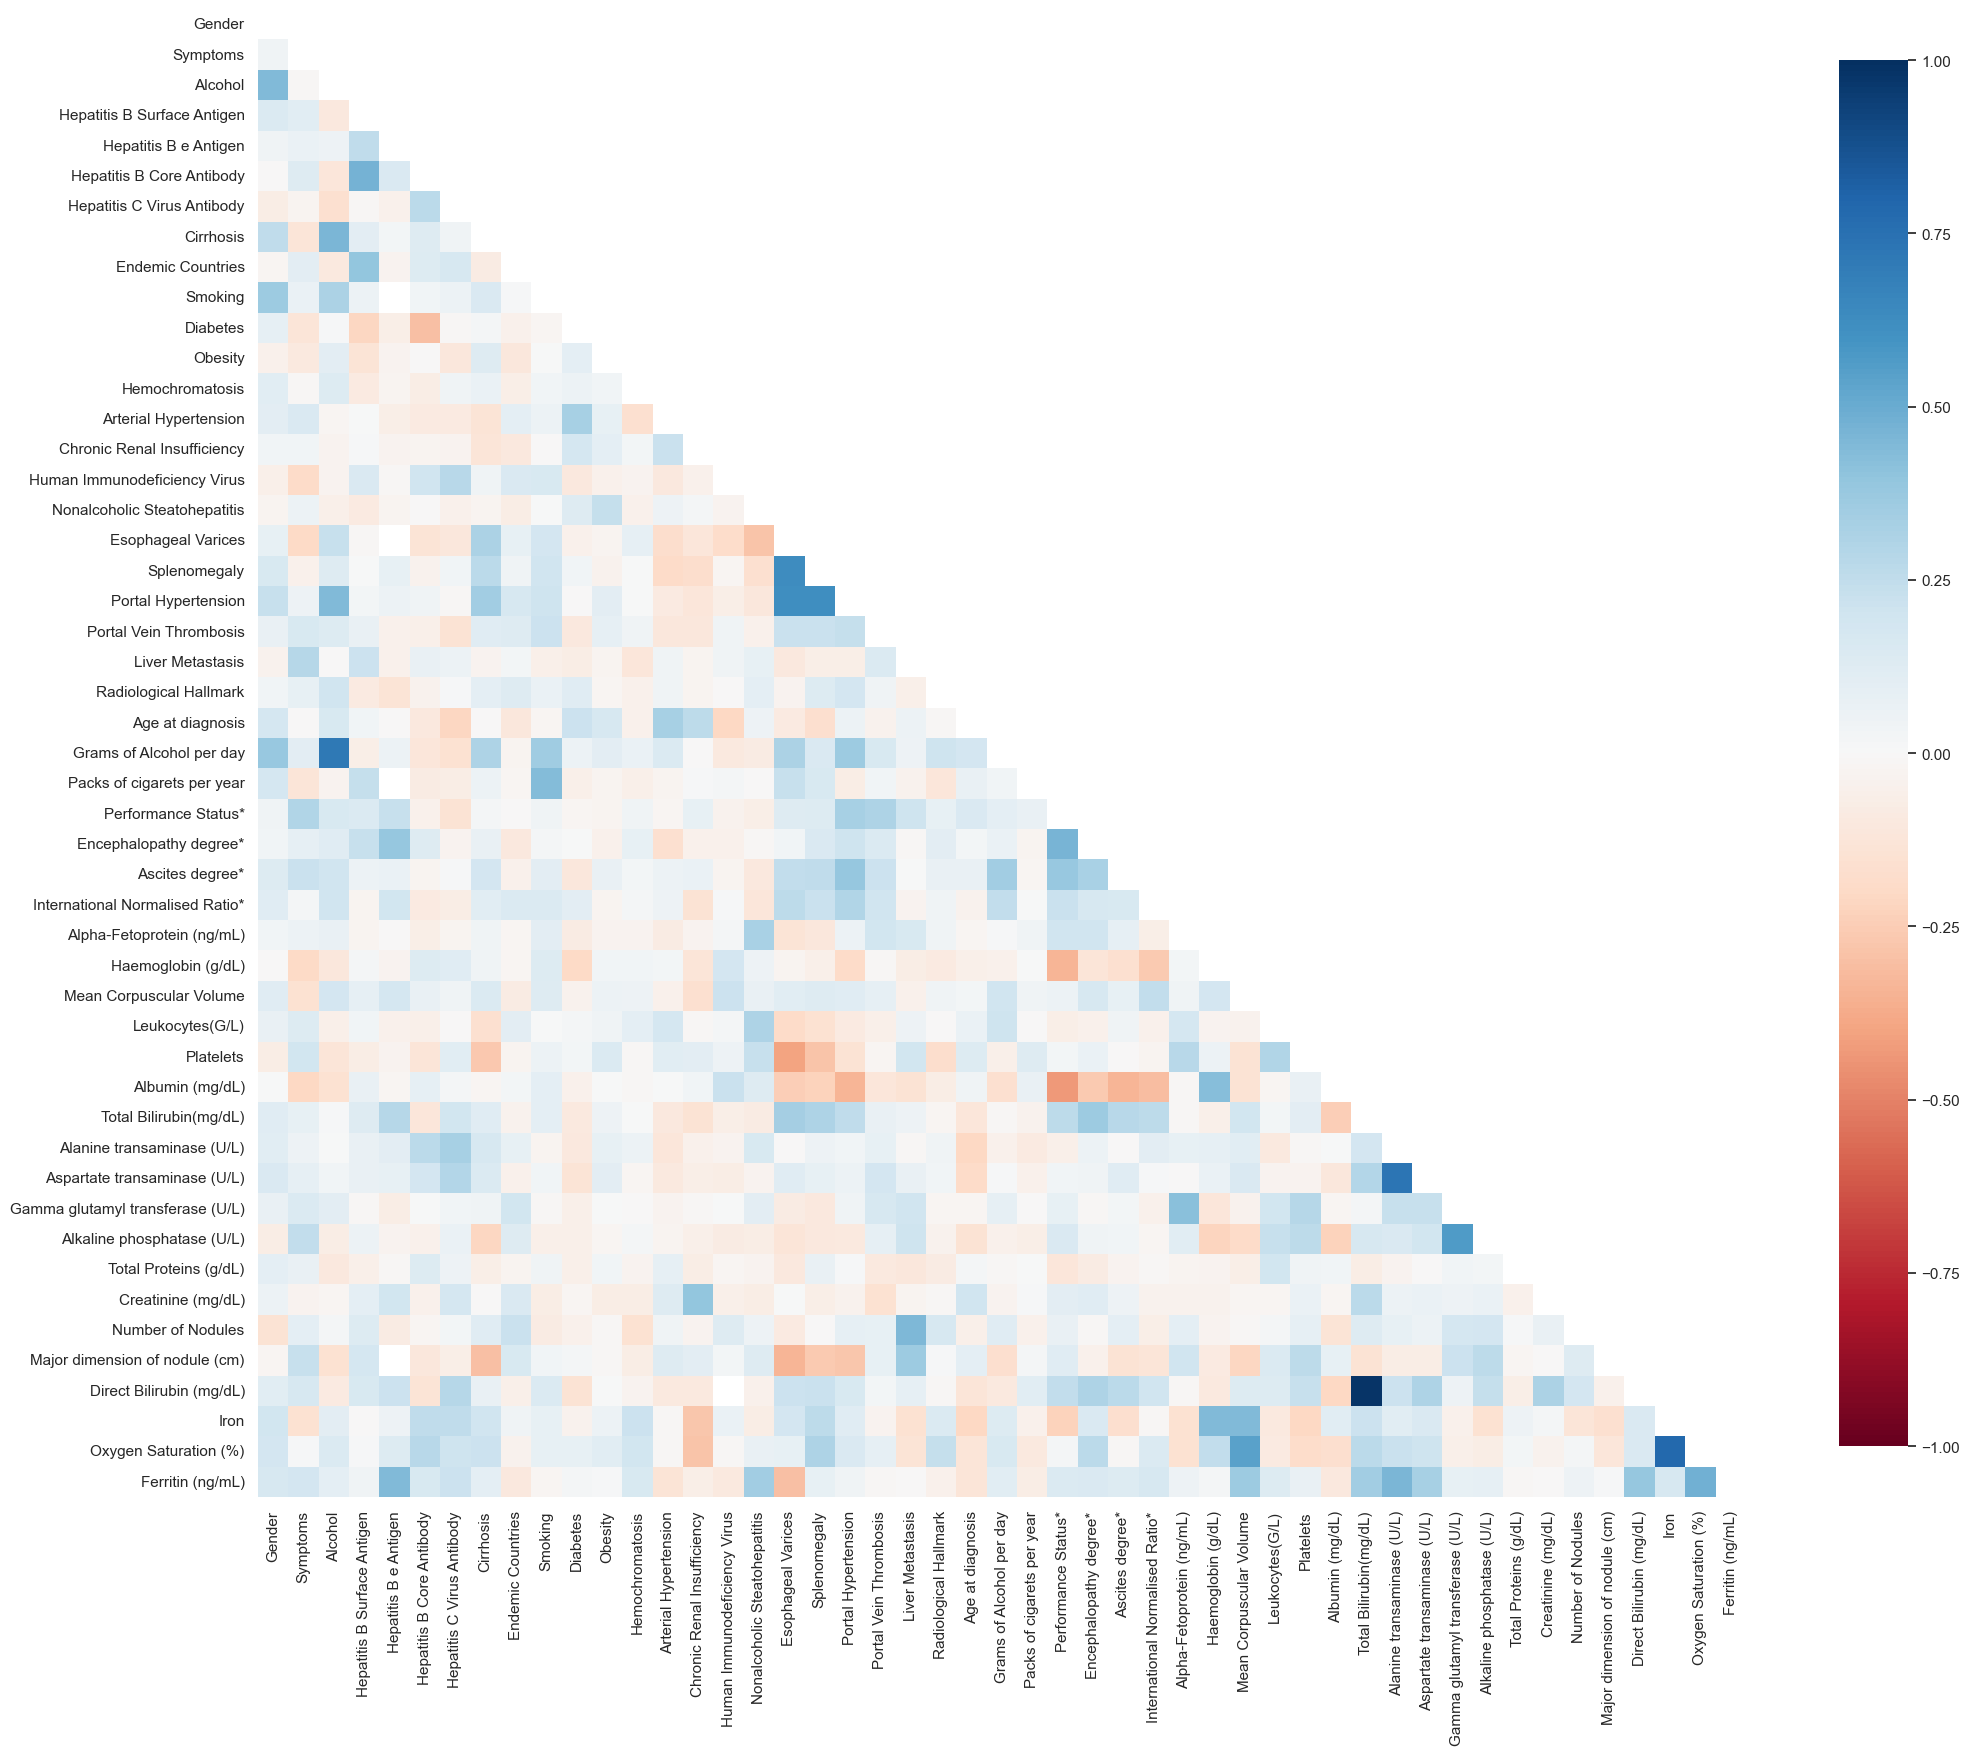

INFO: Running Univariate Analyses...
INFO: Plotting top significant 20 features.
INFO: ###################################################
INFO: Significant Univariate Associations:
INFO: Alkaline phosphatase (U/L): (p-val = 8.425494437393163e-07)
INFO: Performance Status*: (p-val = 1.8787043290235831e-06)
INFO: Alpha-Fetoprotein (ng/mL): (p-val = 3.7632257667465082e-06)
INFO: Haemoglobin (g/dL): (p-val = 6.806983230077955e-05)
INFO: Albumin (mg/dL): (p-val = 0.0002097286566980117)
INFO: Symptoms: (p-val = 0.0006092985105592953)
INFO: Ascites degree*: (p-val = 0.0010580963945994142)
INFO: Direct Bilirubin (mg/dL): (p-val = 0.0013544764761447027)
INFO: Aspartate transaminase (U/L): (p-val = 0.0016188344745582482)
INFO: Ferritin (ng/mL): (p-val = 0.0019988859548087426)
INFO: Liver Metastasis: (p-val = 0.002993588224869906)
INFO: Iron: (p-val = 0.009131914019954513)
INFO: Portal Vein Thrombosis: (p-val = 0.01174304115542567)
INFO: Gamma glutamyl transferase (U/L): (p-val = 0.0191207685779

In [16]:
from streamline.runners.dataprocess_runner import DataProcessRunner
dpr = DataProcessRunner(data_path, output_path, experiment_name, 
                exclude_eda_output=exclude_eda_output,
                class_label=class_label, instance_label=instance_label, 
                match_label=match_label, n_splits=n_splits, 
                partition_method=partition_method,
                ignore_features=ignore_features, 
                categorical_features=categorical_feature_headers,
                quantitative_features=quantitiative_feature_headers,
                top_features=top_uni_features,
                categorical_cutoff=categorical_cutoff, sig_cutoff=sig_cutoff,
                featureeng_missingness=featureeng_missingness,
                cleaning_missingness=cleaning_missingness,
                correlation_removal_threshold=correlation_removal_threshold,
                random_state=random_state, show_plots=True)
dpr.run(run_parallel=False)

## Phase 2: Scaling and Imputation
After cell runs, you will see:
* No output other than code progress updates

In [17]:
from streamline.runners.imputation_runner import ImputationRunner
ir = ImputationRunner(output_path, experiment_name, 
                        scale_data=scale_data, impute_data=impute_data,
                        multi_impute=multi_impute, overwrite_cv=overwrite_cv, 
                        class_label=class_label, instance_label=instance_label, 
                        random_state=random_state)
ir.run(run_parallel=False)

INFO: Preparing Train and Test for: hcc_data_custom_CV_0
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc_data_custom Phase 2 complete
INFO: Preparing Train and Test for: hcc_data_custom_CV_1
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc_data_custom Phase 2 complete
INFO: Preparing Train and Test for: hcc_data_custom_CV_2
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc_data_custom Phase 2 complete
INFO: Preparing Train and Test for: hcc_data_CV_1
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc_data Phase 2 complete
INFO: Preparing Train and Test for: hcc_data_CV_0
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc_data Phase 2 complete
INFO: Pr

## Phase 3: Feature Importance Evaluation
After cell runs, you will see:
* No output other than code progress updates

In [18]:
feat_algorithms = []
if do_mutual_info:
    feat_algorithms.append("MI")
if do_multisurf:
    feat_algorithms.append("MS")

In [19]:
from streamline.runners.feature_runner import FeatureImportanceRunner
f_imp = FeatureImportanceRunner(output_path, experiment_name, 
                                class_label=class_label, 
                                instance_label=instance_label,
                                instance_subset=instance_subset, 
                                algorithms=feat_algorithms, 
                                use_turf=use_TURF, turf_pct=TURF_pct, 
                                random_state=random_state)
f_imp.run(run_parallel=False)

INFO: ------------------------------------------------------- 
INFO: Loading Dataset: hcc_data_custom_CV_0_Train
INFO: Prepared Train and Test for: hcc_data_custom_CV_0
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc_data_custom CV0 phase 3 mutual_information evaluation complete
INFO: ------------------------------------------------------- 
INFO: Loading Dataset: hcc_data_custom_CV_1_Train
INFO: Prepared Train and Test for: hcc_data_custom_CV_1
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc_data_custom CV1 phase 3 mutual_information evaluation complete
INFO: ------------------------------------------------------- 
INFO: Loading Dataset: hcc_data_custom_CV_2_Train
INFO: Prepared Train and Test for: hcc_data_custom_CV_2
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc_data_custom CV2 phase 3 mutual_information evaluation complete
INFO: -------

## Phase 4: Feature Selection
After cell runs, for each target dataset and each feature importance algorithm you will see:
* Top feature importance scores
* A barplot of top feature imporance score ranking

INFO: Plotting Feature Importance Scores...
INFO:                            Feature  Importance
28       Alpha-Fetoprotein (ng/mL)    0.122190
24             Performance Status*    0.102941
38      Alkaline phosphatase (U/L)    0.084033
44                            Iron    0.083419
46                Ferritin (ng/mL)    0.071803
33                 Albumin (mg/dL)    0.066835
29              Haemoglobin (g/dL)    0.063182
42  Major dimension of nodule (cm)    0.060912
4        Hepatitis B Core Antibody    0.055815
43        Direct Bilirubin (mg/dL)    0.053170
INFO: Saved Feature Importance Plots at
INFO: ./DemoOutput/demo_experiment/hcc_data_custom/feature_selection/mutual_information/TopAverageScores.png


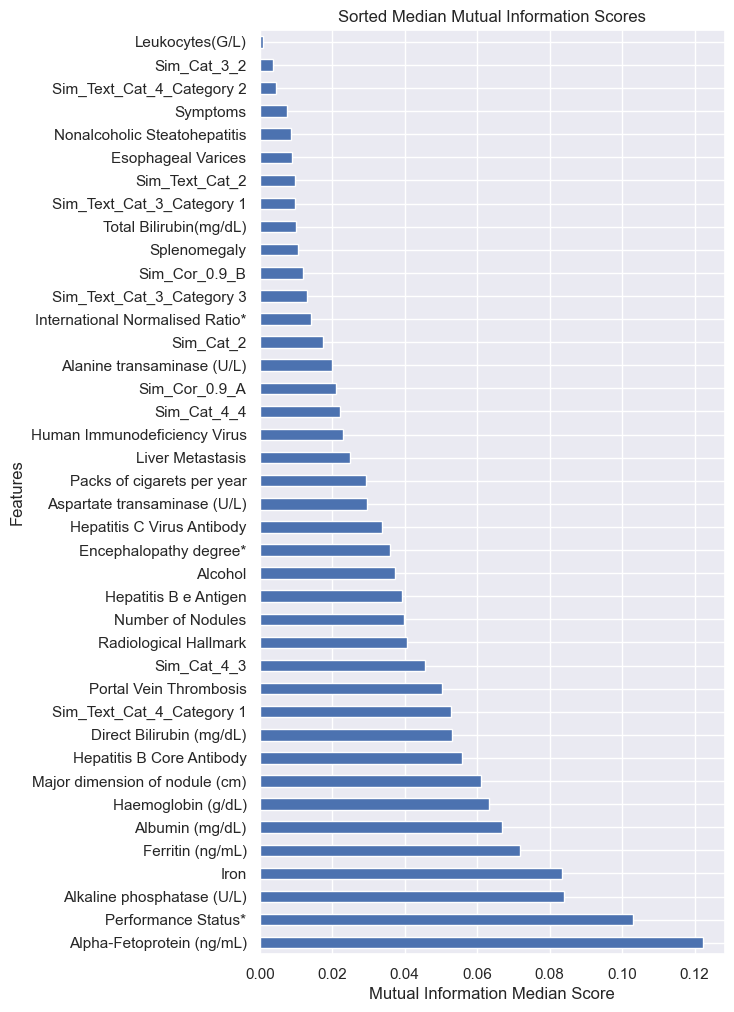

INFO:                              Feature  Importance
29                Haemoglobin (g/dL)    0.122357
38        Alkaline phosphatase (U/L)    0.089723
24               Performance Status*    0.071719
20                  Liver Metastasis    0.058686
26                   Ascites degree*    0.054888
45             Oxygen Saturation (%)    0.047518
37  Gamma glutamyl transferase (U/L)    0.047229
36      Aspartate transaminase (U/L)    0.039825
0                           Symptoms    0.036229
33                   Albumin (mg/dL)    0.036112
INFO: Saved Feature Importance Plots at
INFO: ./DemoOutput/demo_experiment/hcc_data_custom/feature_selection/multisurf/TopAverageScores.png


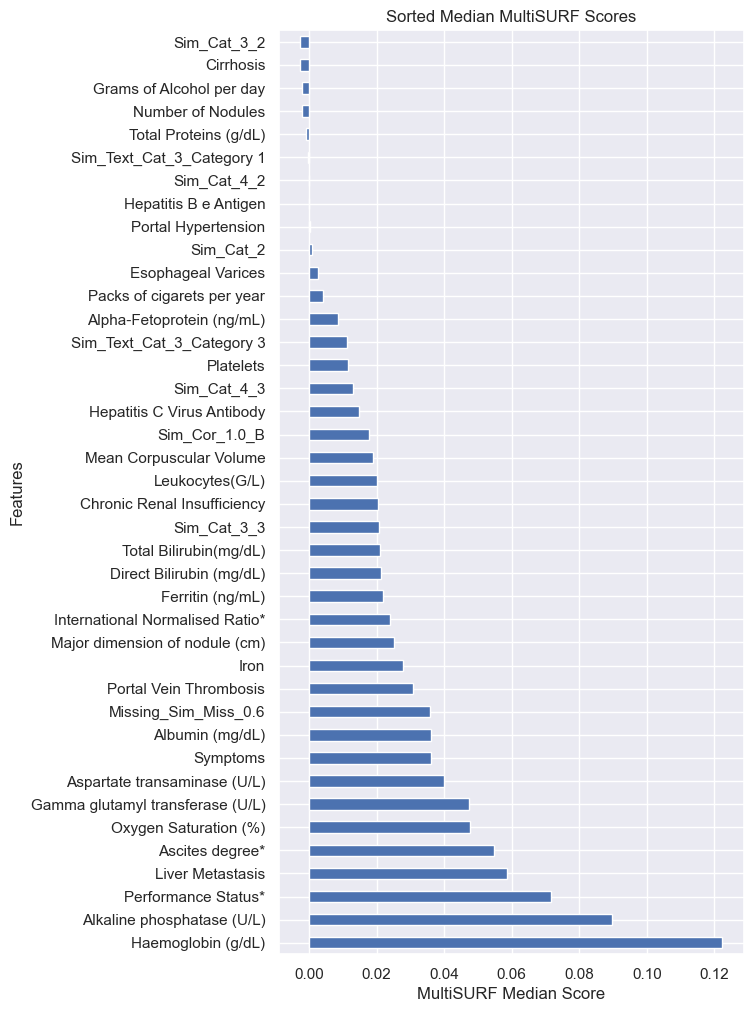

INFO: Applying collective feature selection...
INFO: hcc_data_custom Phase 4 Complete
INFO: Plotting Feature Importance Scores...
INFO:                            Feature  Importance
30       Alpha-Fetoprotein (ng/mL)    0.122169
26             Performance Status*    0.121332
1                         Symptoms    0.077926
48                Ferritin (ng/mL)    0.072561
40      Alkaline phosphatase (U/L)    0.072198
31              Haemoglobin (g/dL)    0.061457
23                Age at diagnosis    0.058108
35                 Albumin (mg/dL)    0.052770
46                            Iron    0.048957
44  Major dimension of nodule (cm)    0.047258
INFO: Saved Feature Importance Plots at
INFO: ./DemoOutput/demo_experiment/hcc_data/feature_selection/mutual_information/TopAverageScores.png


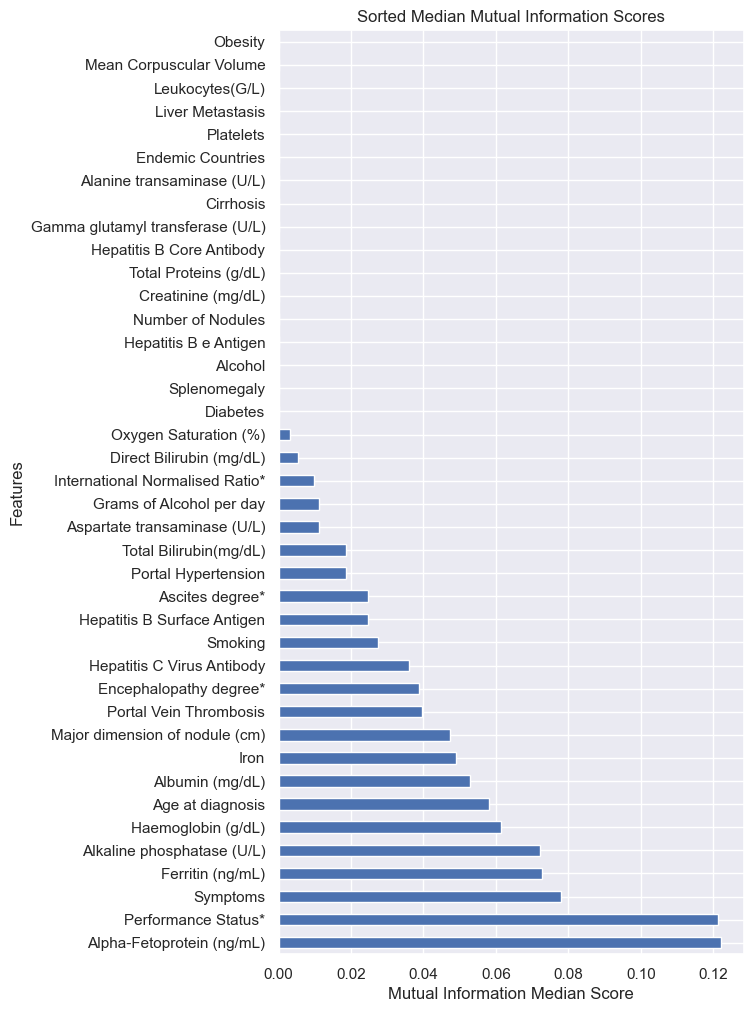

INFO:                              Feature  Importance
31                Haemoglobin (g/dL)    0.106311
40        Alkaline phosphatase (U/L)    0.095767
26               Performance Status*    0.078628
47             Oxygen Saturation (%)    0.057034
28                   Ascites degree*    0.055786
21                  Liver Metastasis    0.055732
46                              Iron    0.052026
39  Gamma glutamyl transferase (U/L)    0.038462
1                           Symptoms    0.033465
44    Major dimension of nodule (cm)    0.029253
INFO: Saved Feature Importance Plots at
INFO: ./DemoOutput/demo_experiment/hcc_data/feature_selection/multisurf/TopAverageScores.png


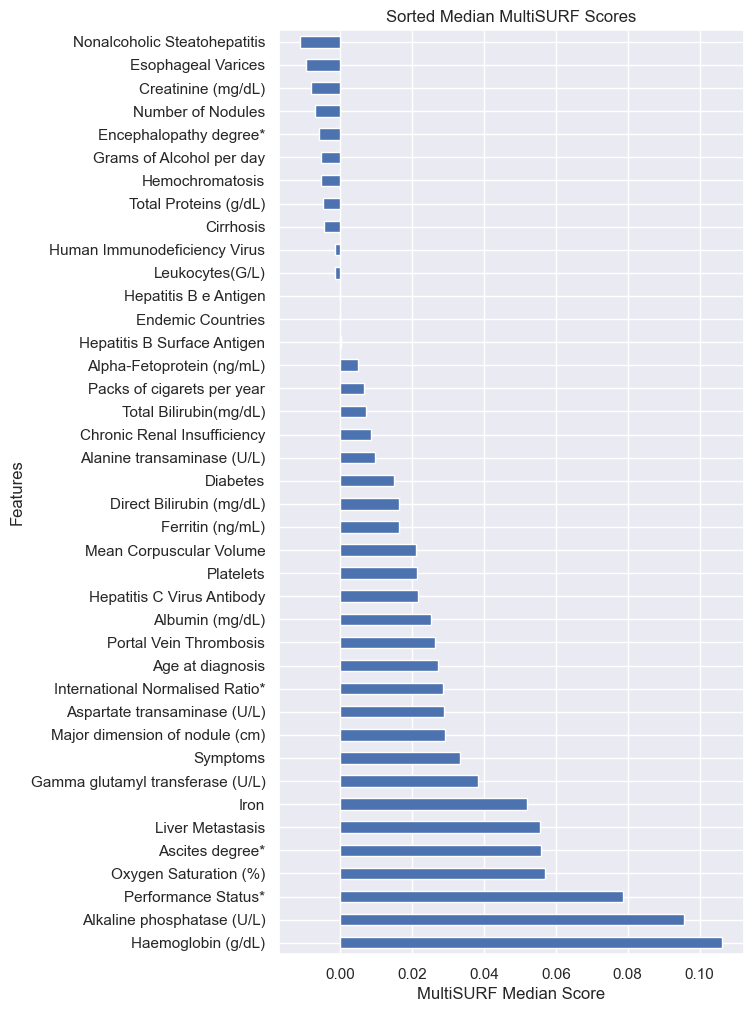

INFO: Applying collective feature selection...
INFO: hcc_data Phase 4 Complete


In [20]:
from streamline.runners.feature_runner import FeatureSelectionRunner
f_sel = FeatureSelectionRunner(output_path, experiment_name, 
                               feat_algorithms, class_label=class_label, 
                               instance_label=instance_label,
                               max_features_to_keep=max_features_to_keep, 
                               filter_poor_features=filter_poor_features, 
                               top_features=top_fi_features, 
                               export_scores=export_scores,
                               overwrite_cv=overwrite_cv_feat, 
                               random_state=random_state,
                               show_plots=True)
f_sel.run(run_parallel=False)

## Phase 5: Modeling
After cell runs, you will see:
* No output other than code progress bar completion

In [21]:
from streamline.runners.model_runner import ModelExperimentRunner
model_exp = ModelExperimentRunner(
                output_path, experiment_name, algorithms=algorithms, 
                exclude=exclude, class_label=class_label,
                instance_label=instance_label, scoring_metric=primary_metric, 
                metric_direction=metric_direction,
                training_subsample=training_subsample, 
                use_uniform_fi=use_uniform_FI, n_trials=n_trials,
                timeout=timeout, save_plots=False, 
                do_lcs_sweep=do_lcs_sweep, lcs_nu=lcs_nu, lcs_n=lcs_N, 
                lcs_iterations=lcs_iterations,
                lcs_timeout=lcs_timeout, resubmit=False)
model_exp.run(run_parallel=True)

100%|███████████████████████████████████████████| 18/18 [00:03<00:00,  5.66it/s]


## Phase 6: Statistics Summary and Figure Generation
After cell runs, for each target dataset you will see:
* ROC and PRC plots of CV folds for each algorithm
* An ROC and PRC plot comparing average algorithm performance across CV partitions
* Boxplots for each metric comparing algorithm performance (across CV partitions)
* Top feature importance boxplots for each algorithm (across CV partitions)
* Histogram of feature importance for each algorithm
* Composite feature importance plots

INFO: Running Statistics Summary for hcc_data_custom
INFO: Running stats on Naive Bayes


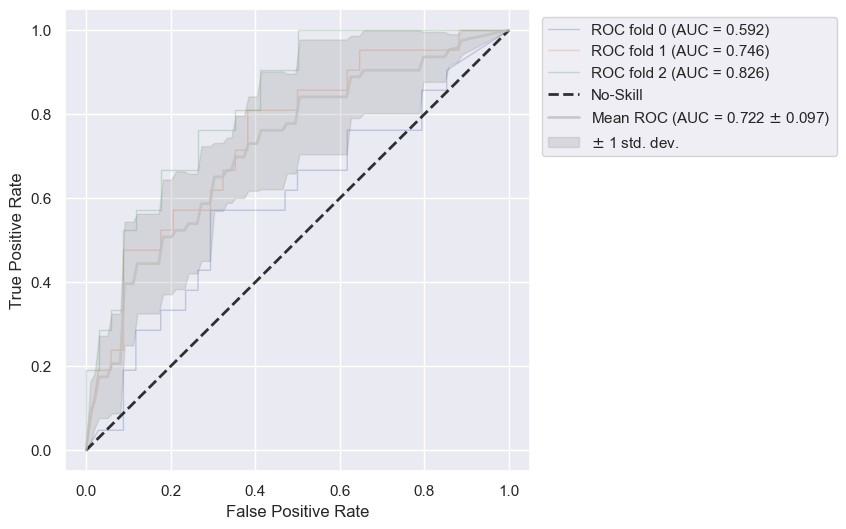

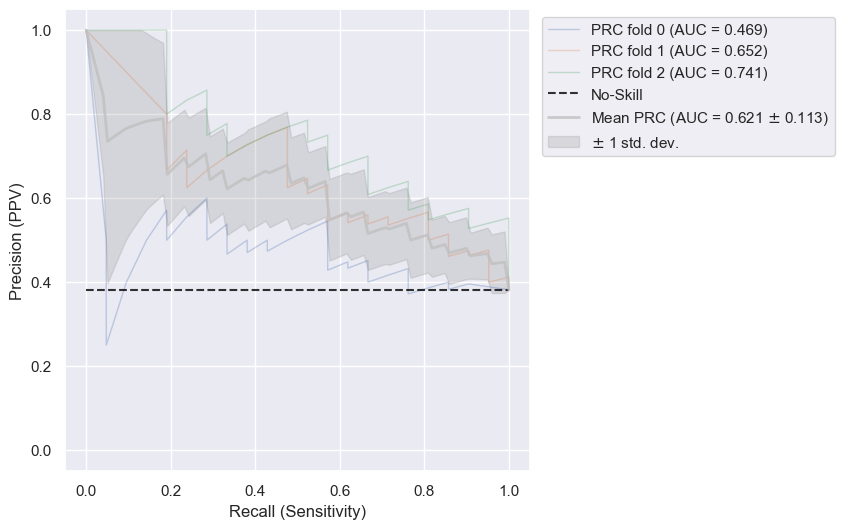

INFO: Running stats on Logistic Regression


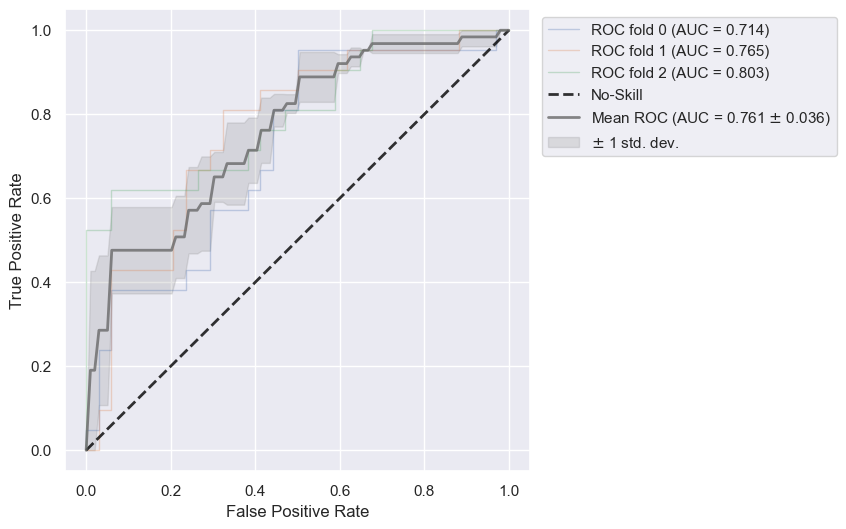

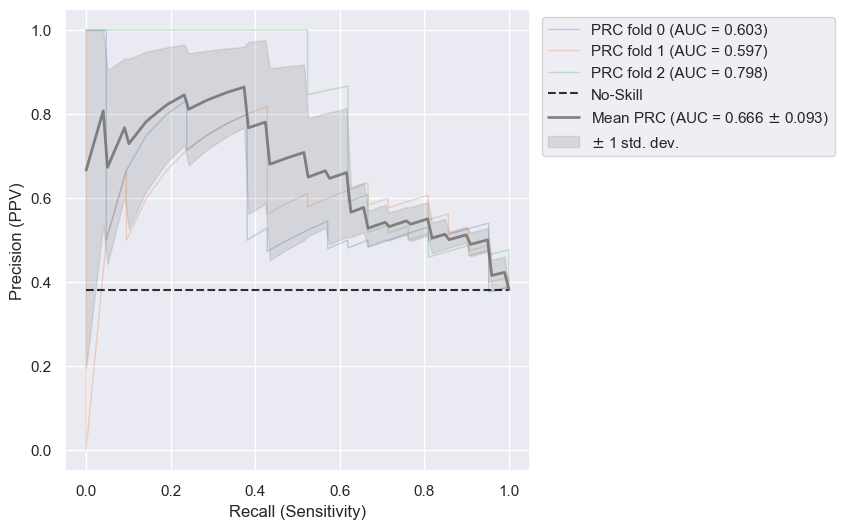

INFO: Running stats on Decision Tree


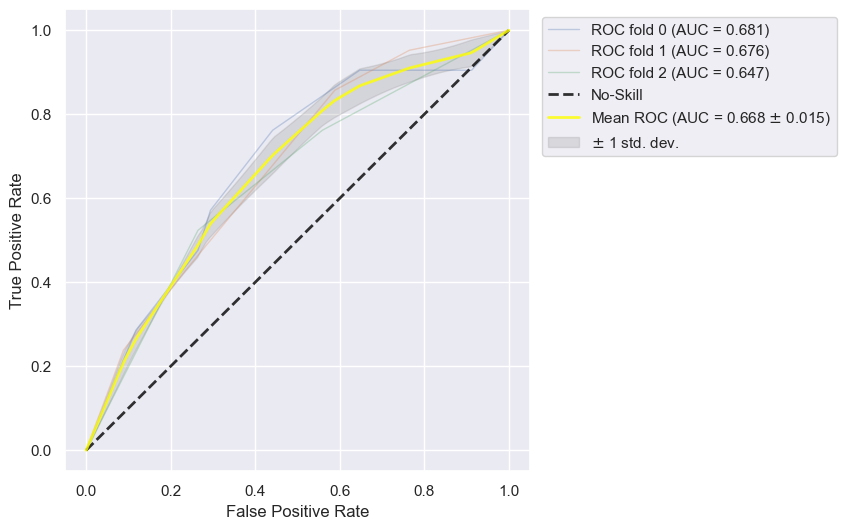

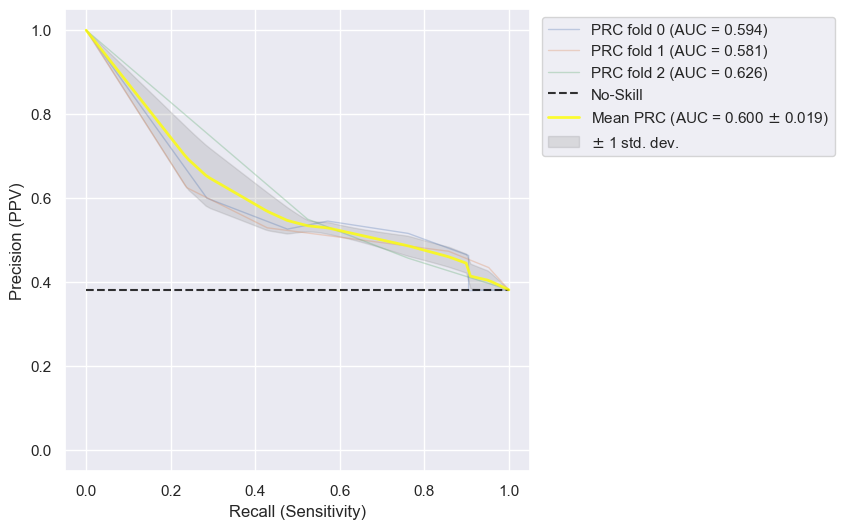

INFO: Generating ROC and PRC plots...


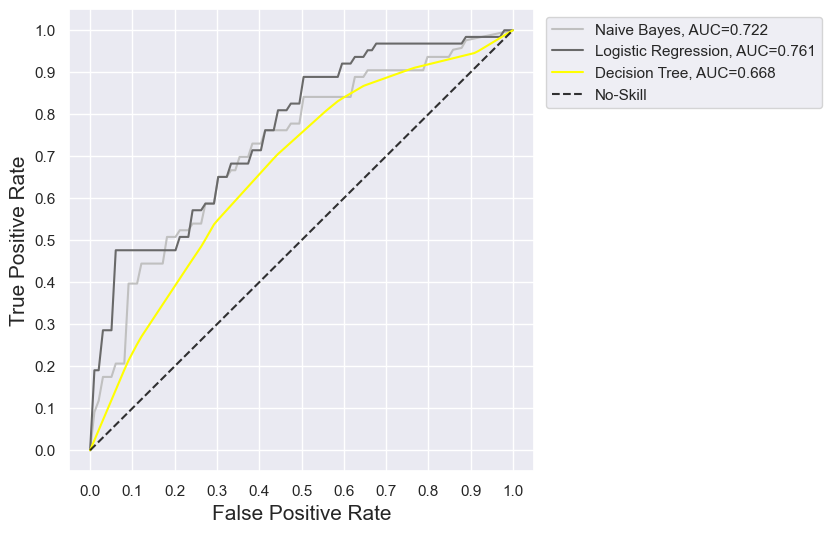

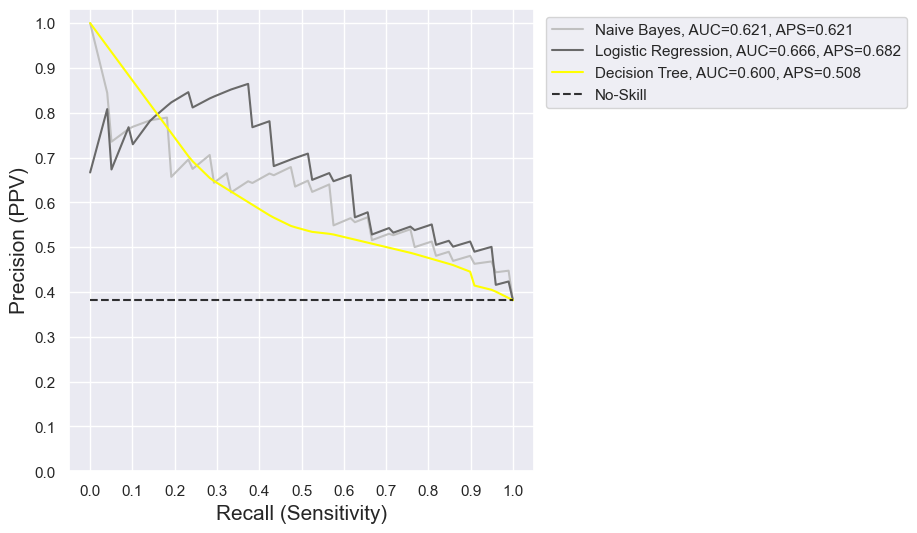

INFO: Saving Metric Summaries...
INFO: Generating Metric Boxplots...


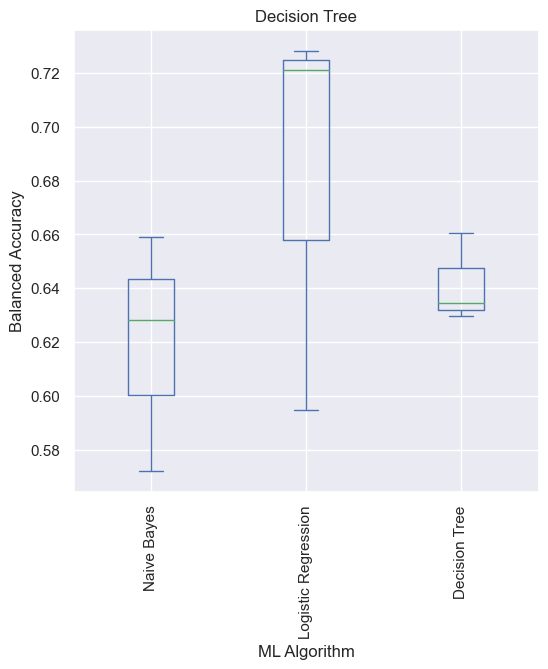

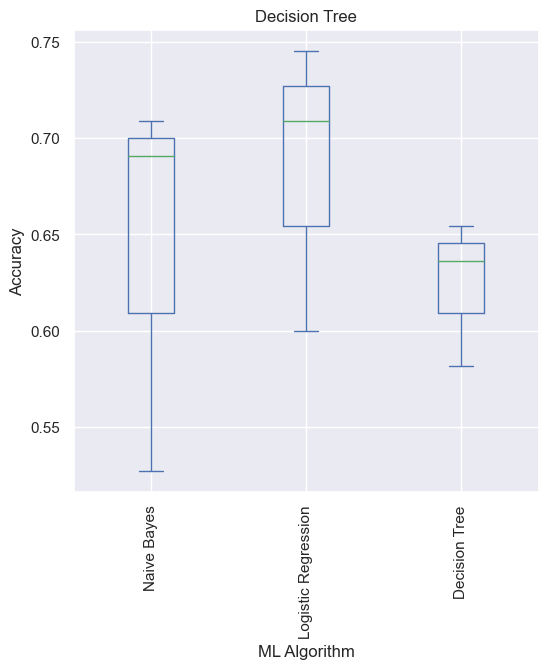

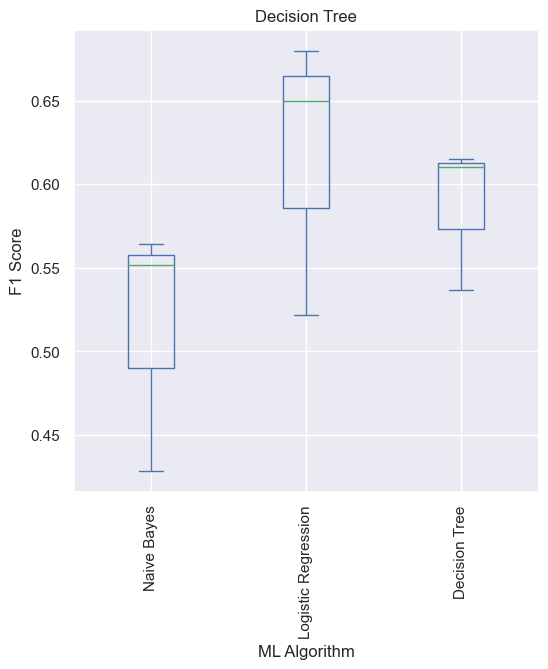

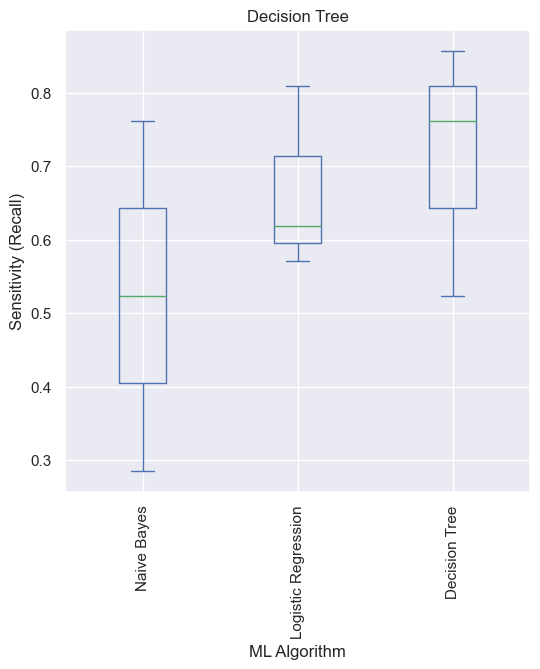

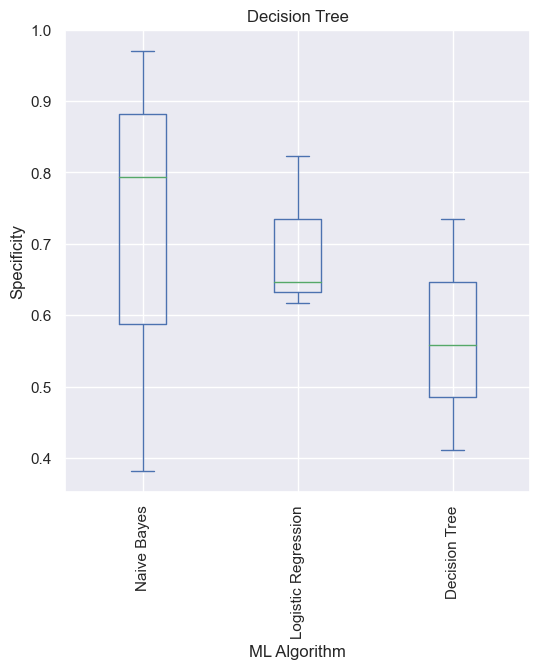

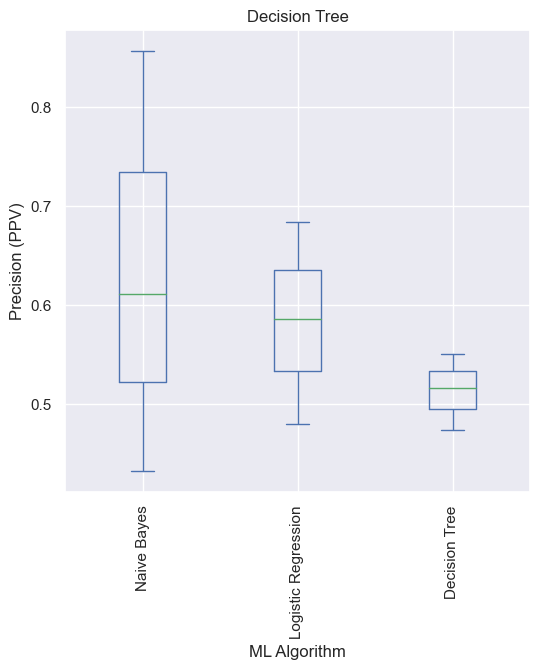

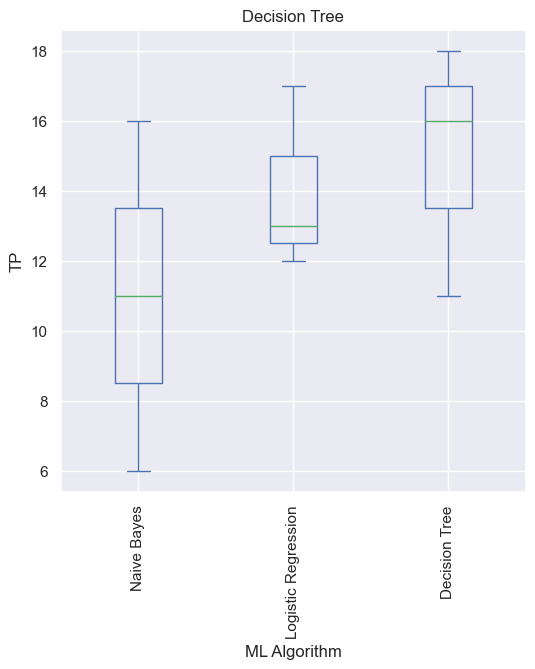

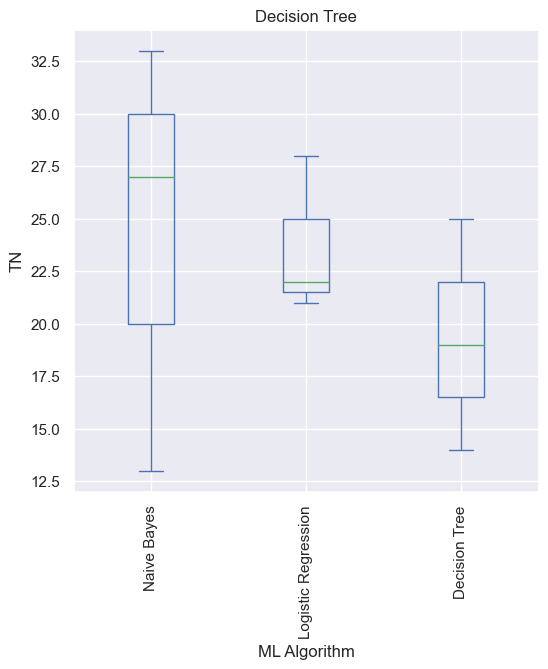

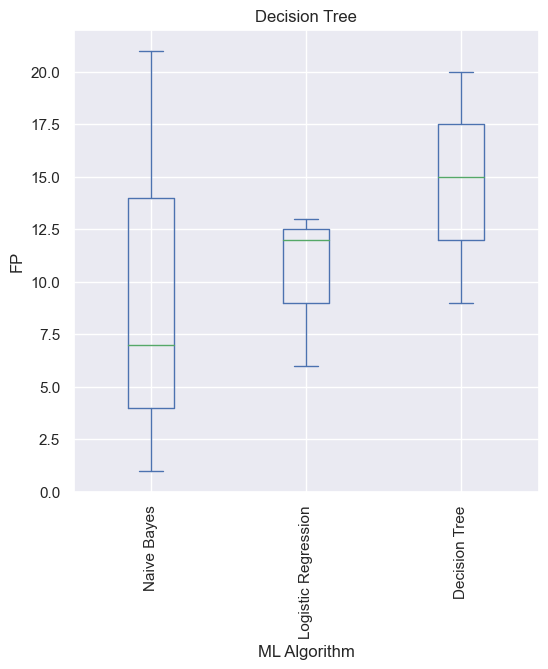

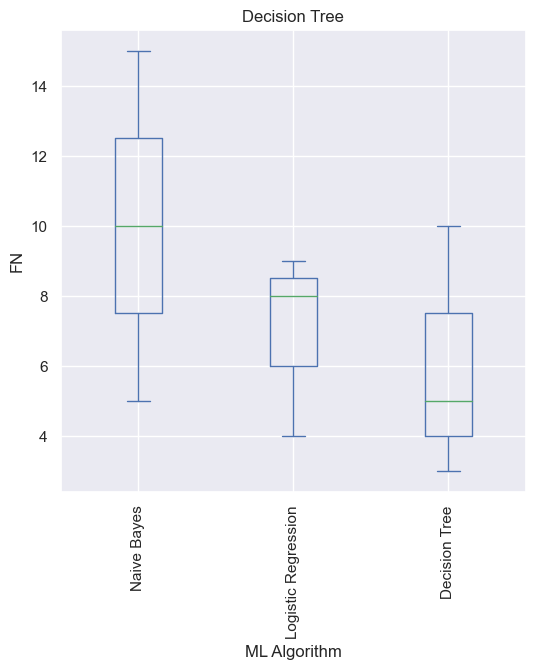

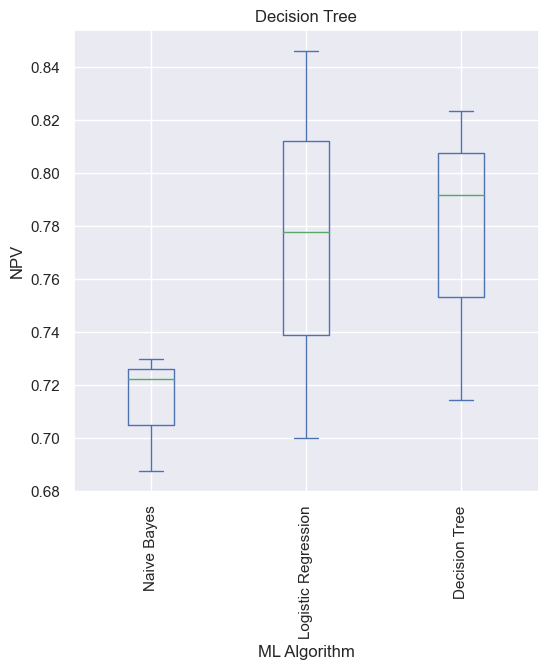

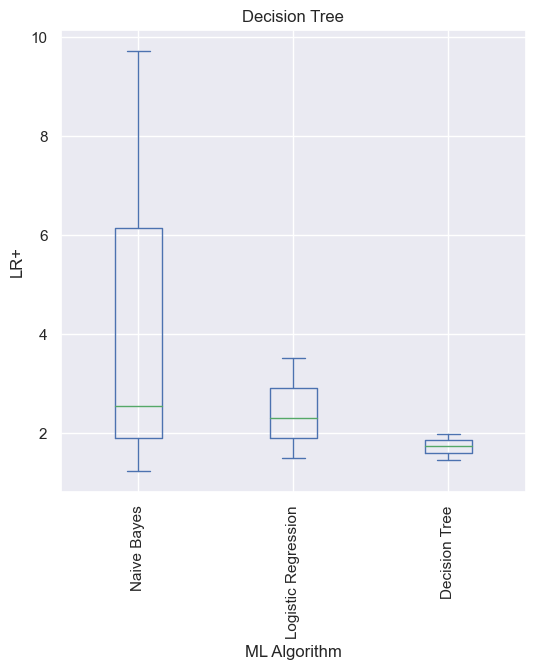

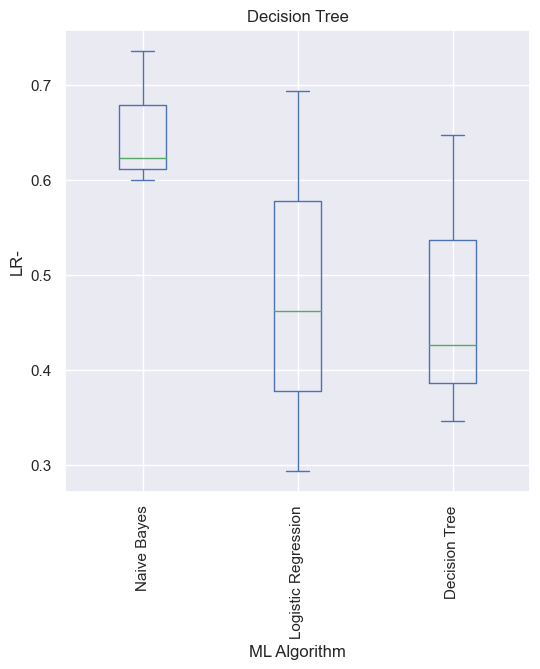

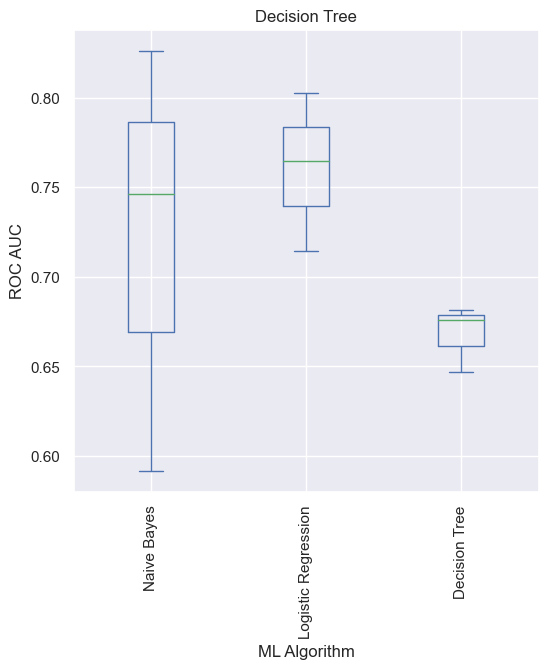

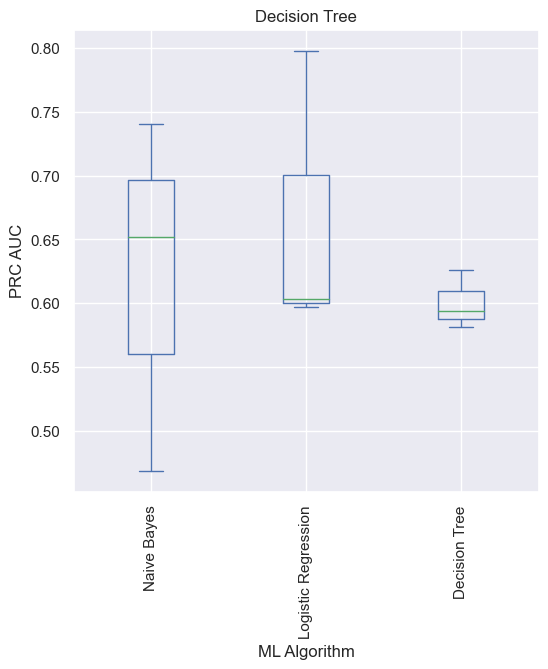

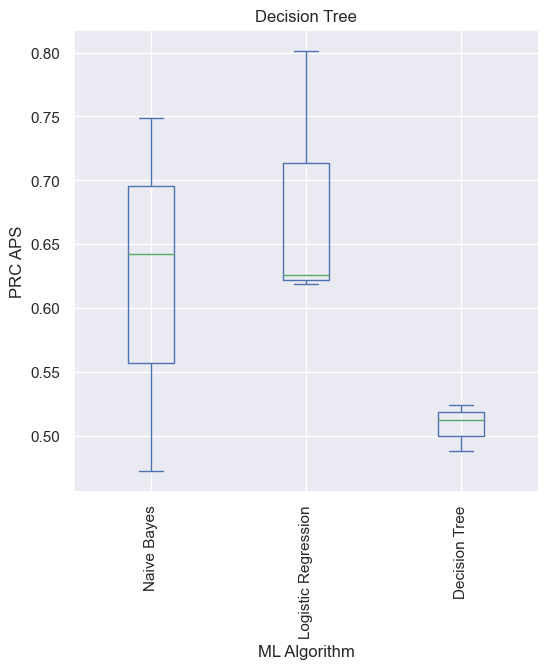

INFO: Running Non-Parametric Statistical Significance Analysis...
INFO: Preparing for Model Feature Importance Plotting...
INFO: Generating Feature Importance Boxplot and Histograms...


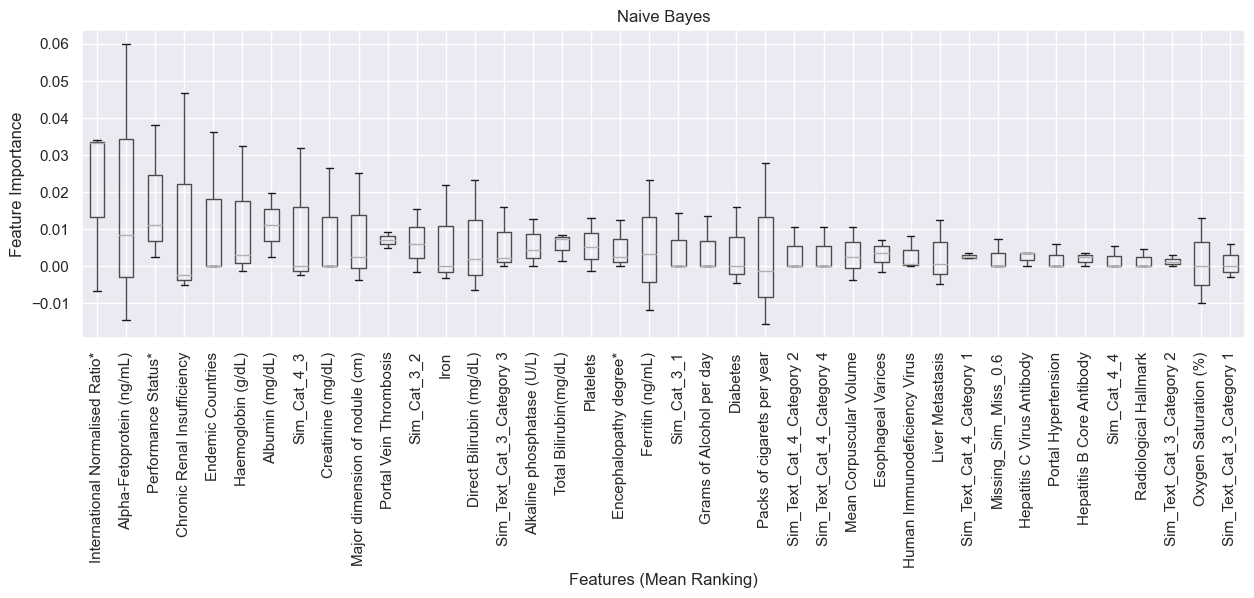

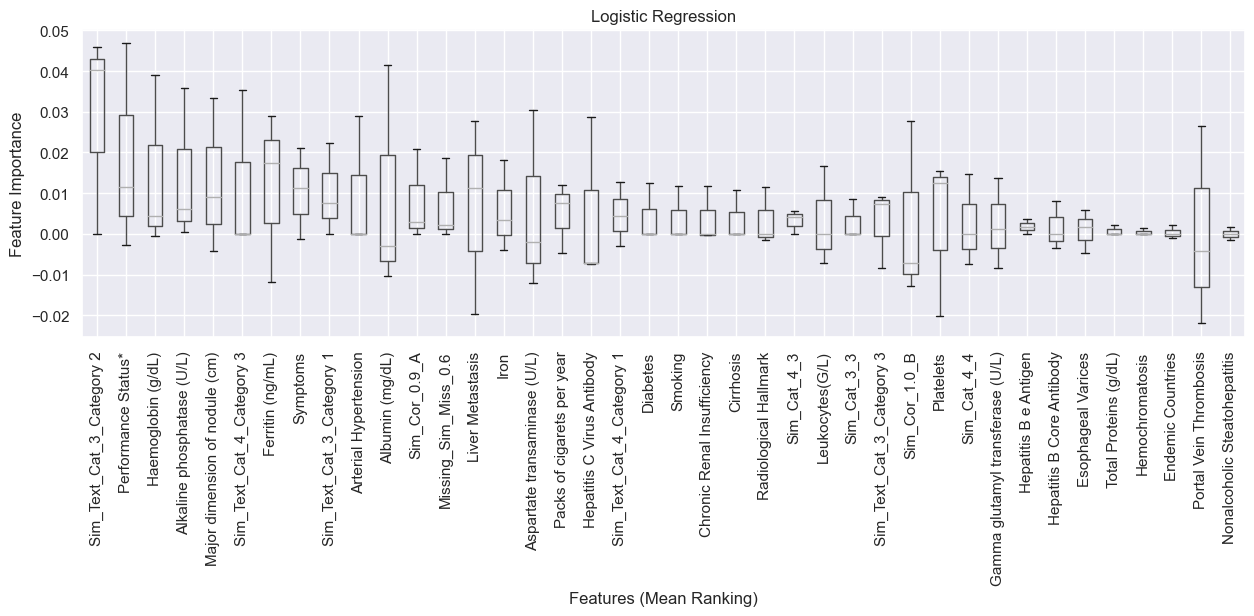

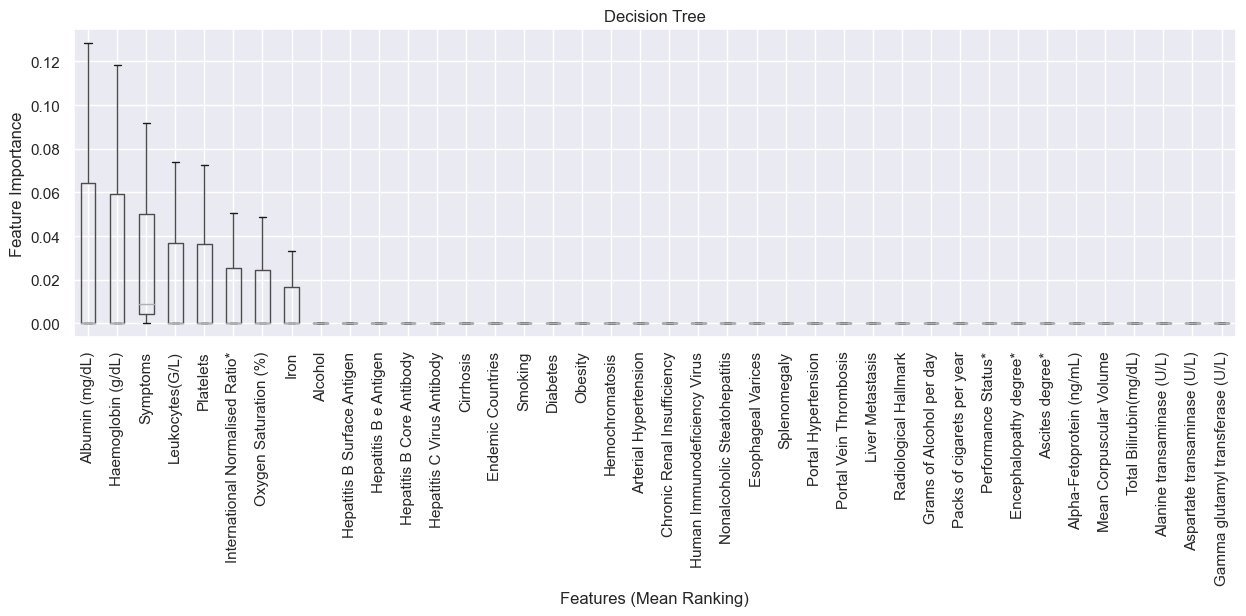

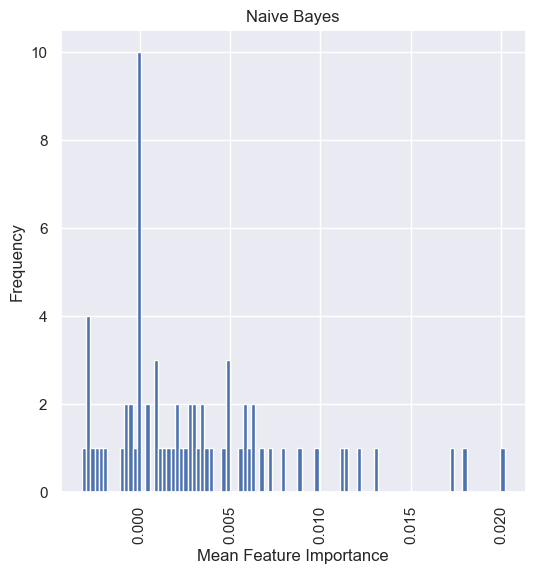

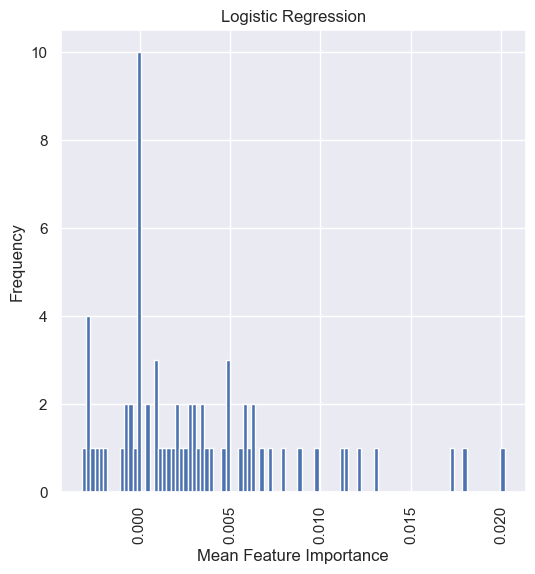

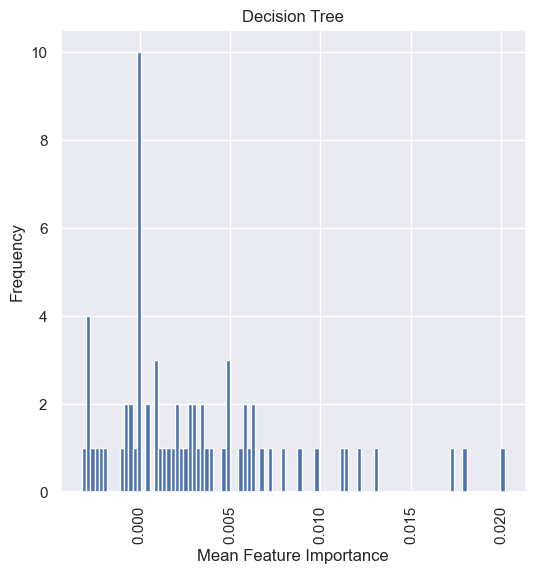

INFO: Generating Composite Feature Importance Plots...


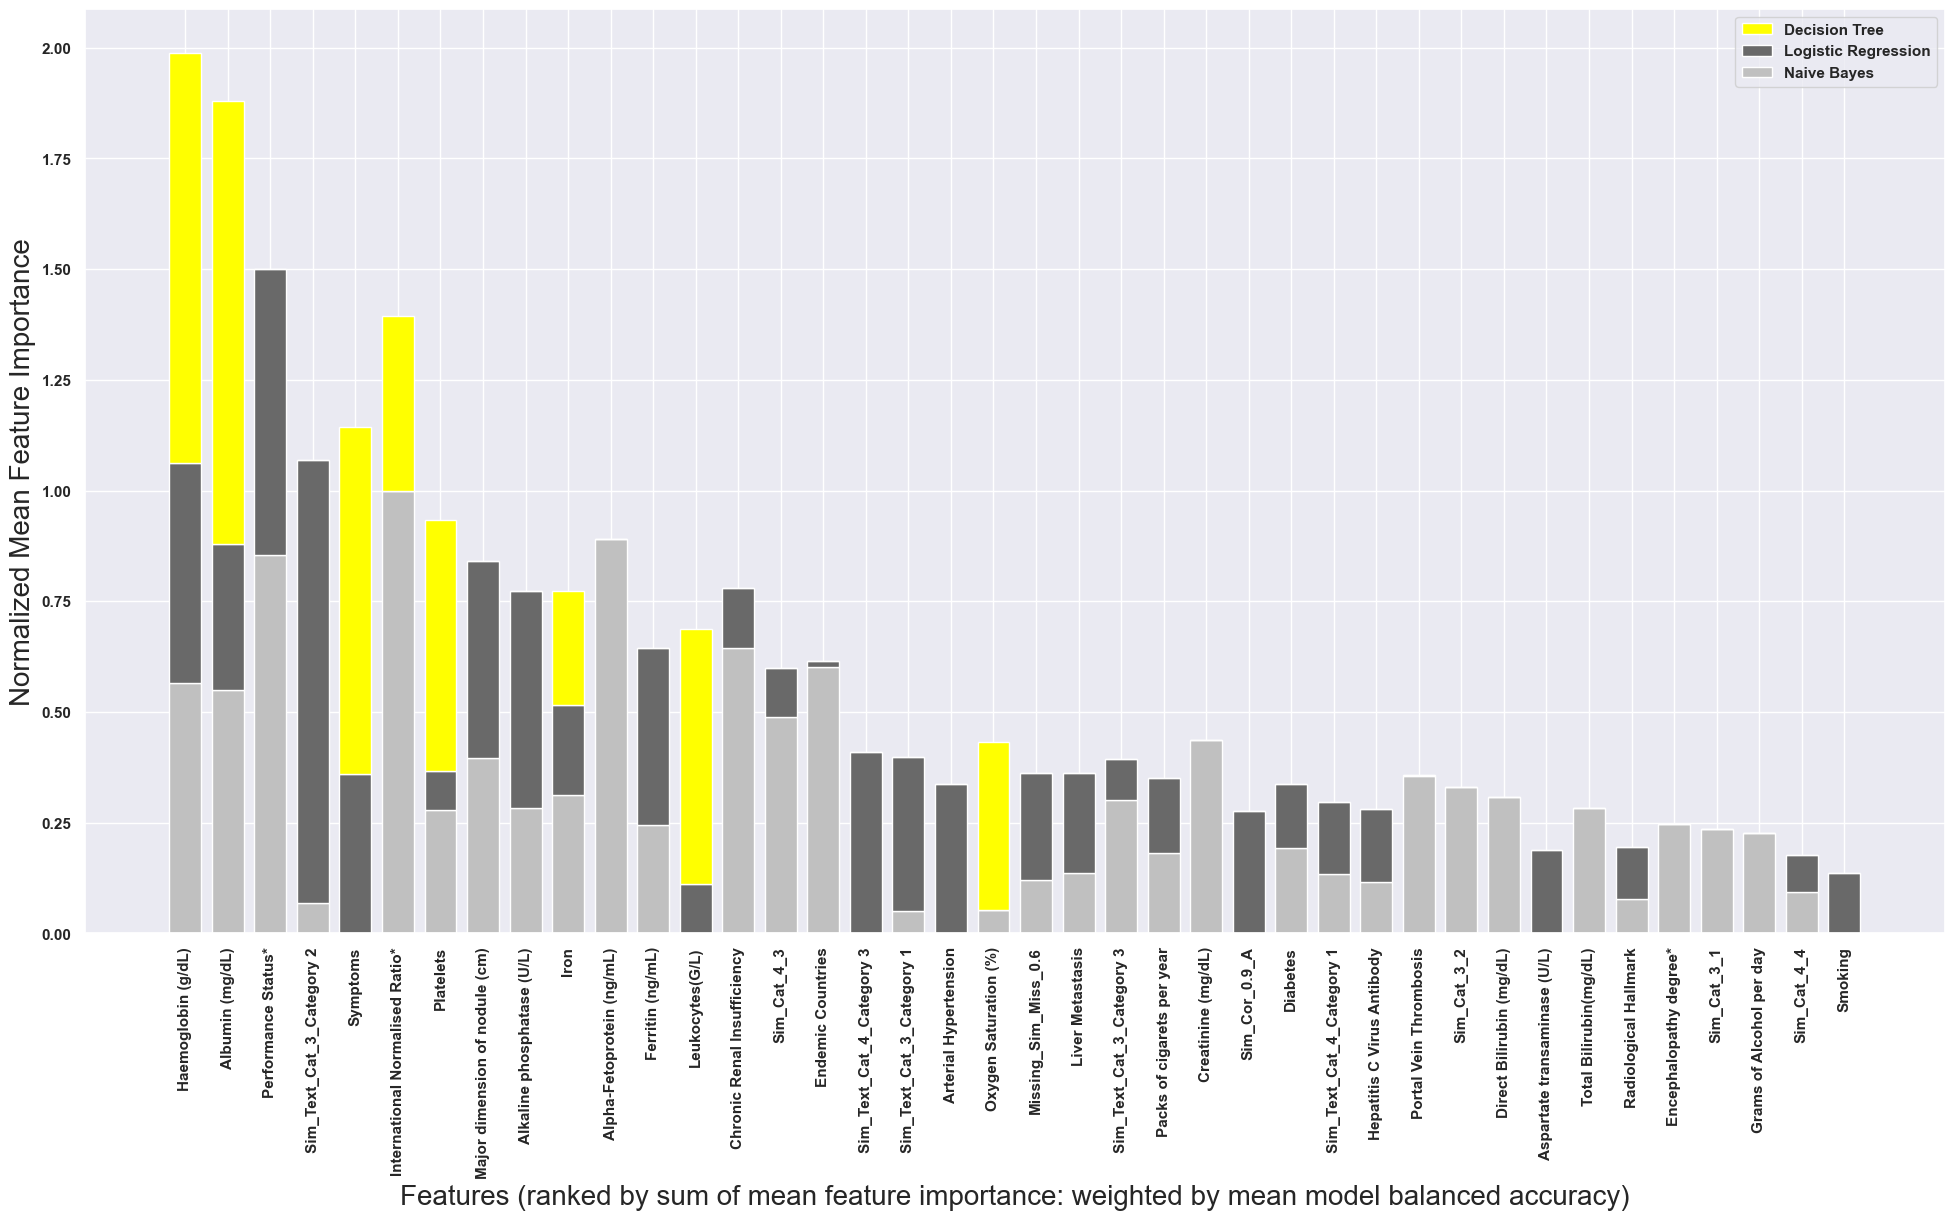

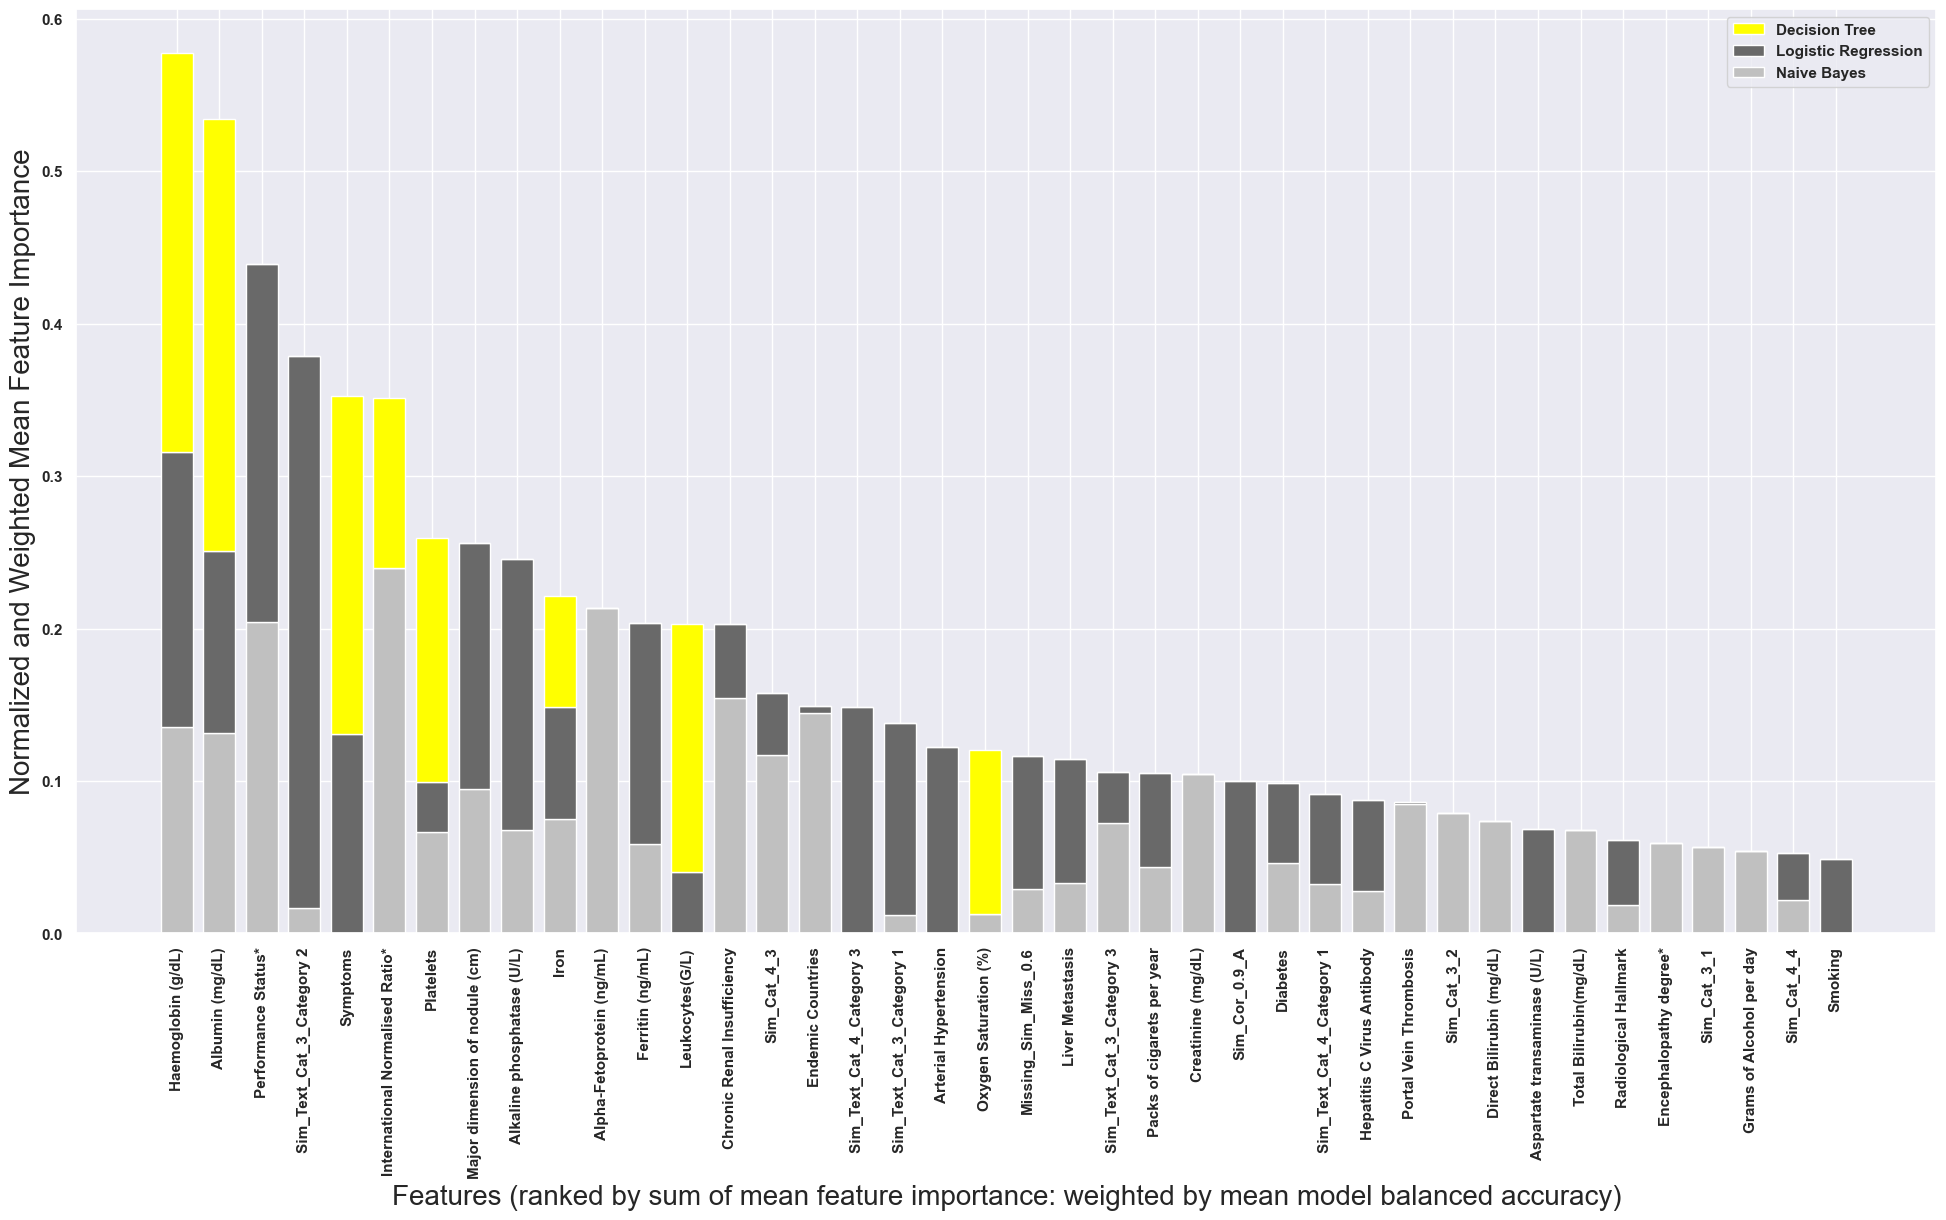

INFO: hcc_data_custom phase 5 complete
INFO: Running Statistics Summary for hcc_data
INFO: Running stats on Naive Bayes


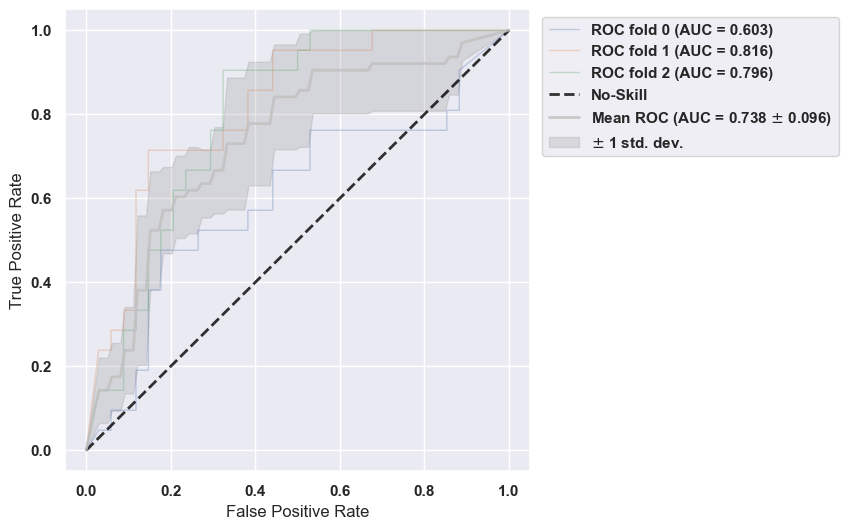

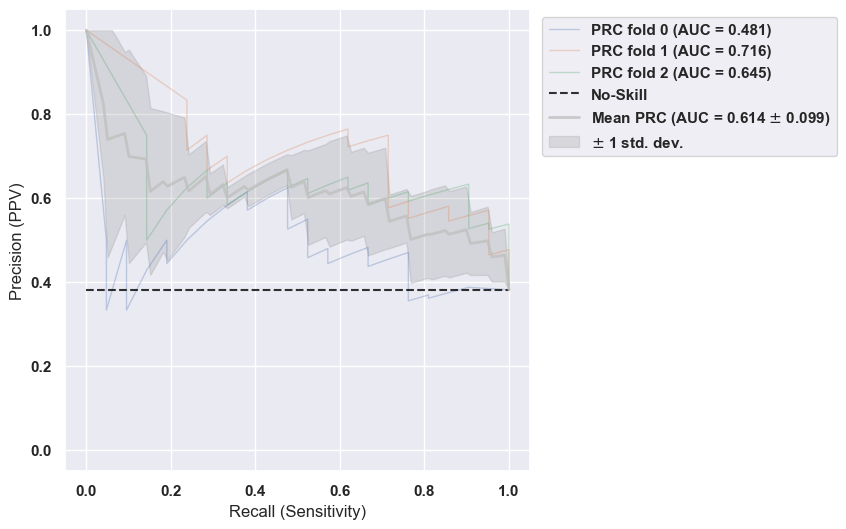

INFO: Running stats on Logistic Regression


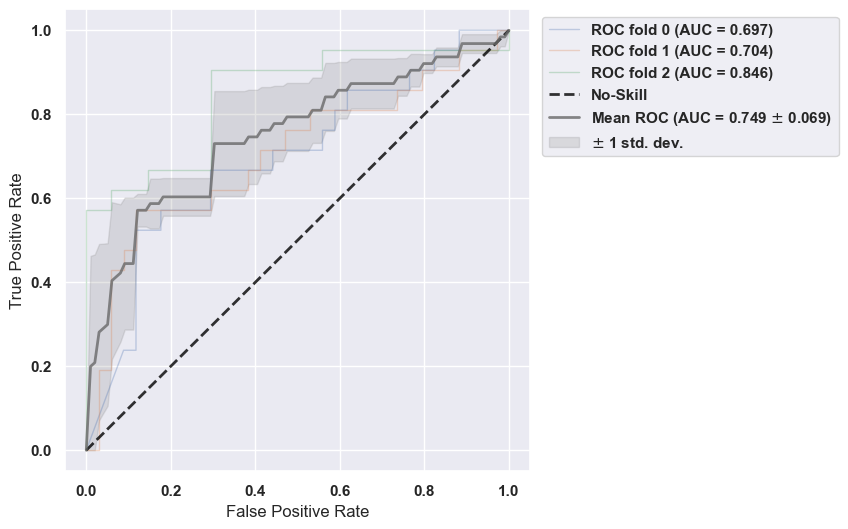

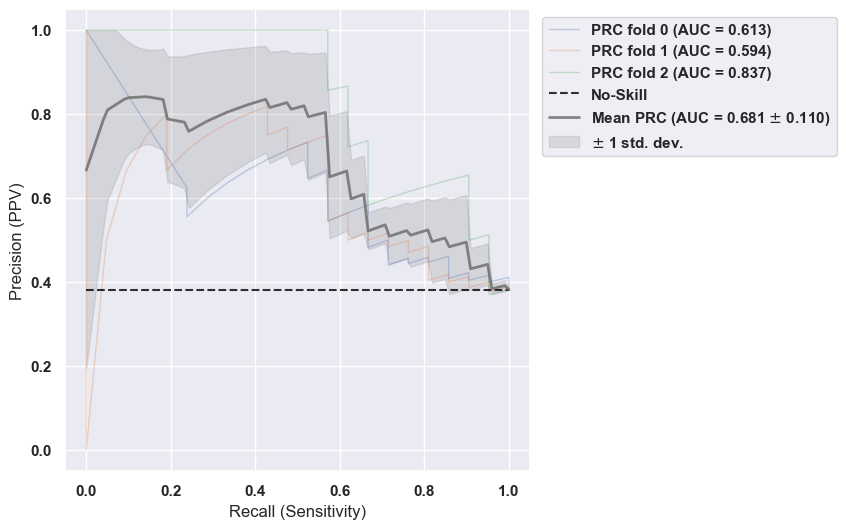

INFO: Running stats on Decision Tree


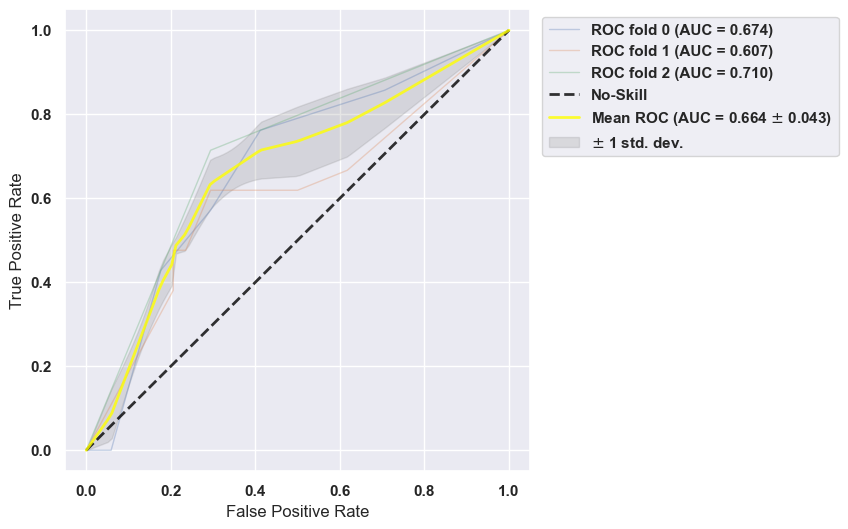

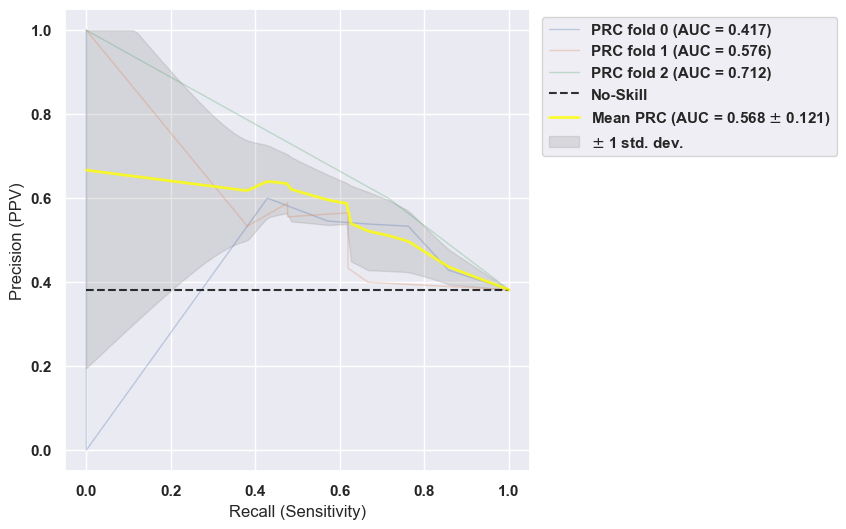

INFO: Generating ROC and PRC plots...


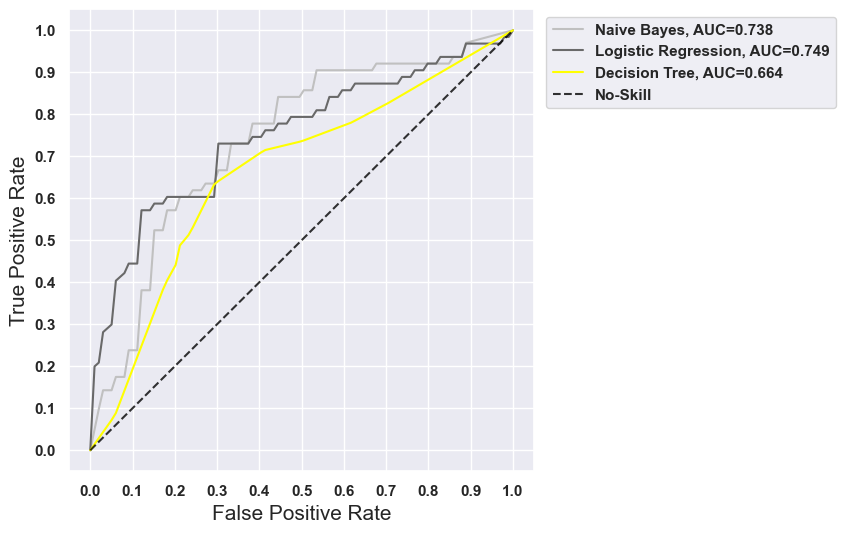

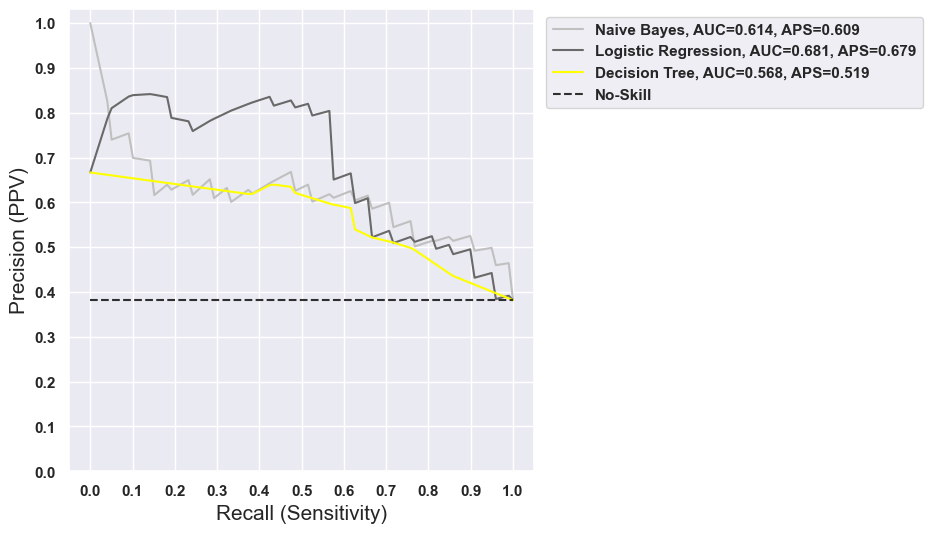

INFO: Saving Metric Summaries...
INFO: Generating Metric Boxplots...


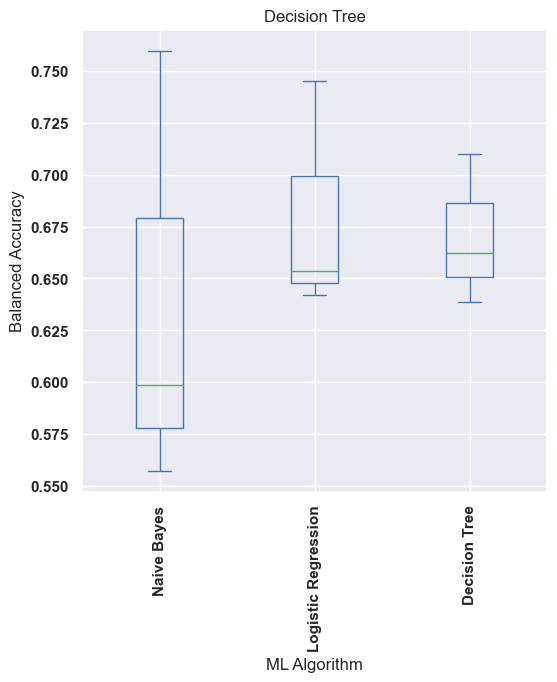

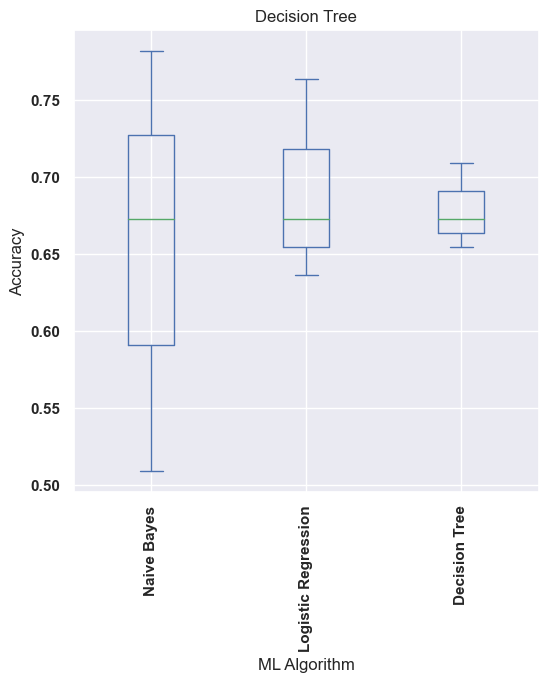

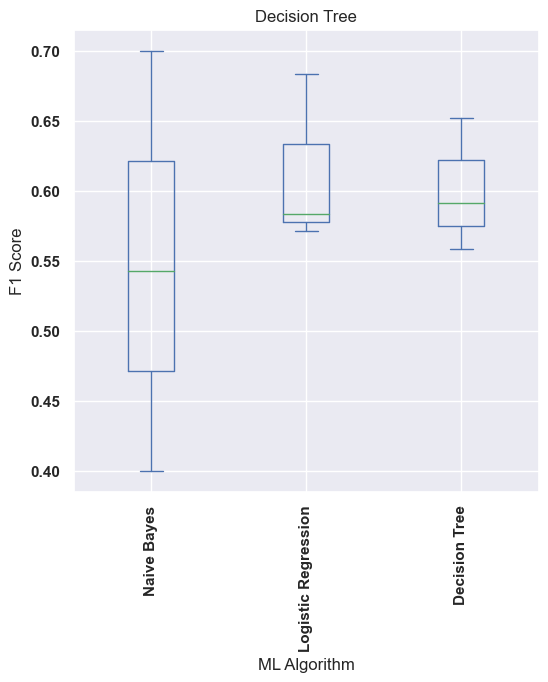

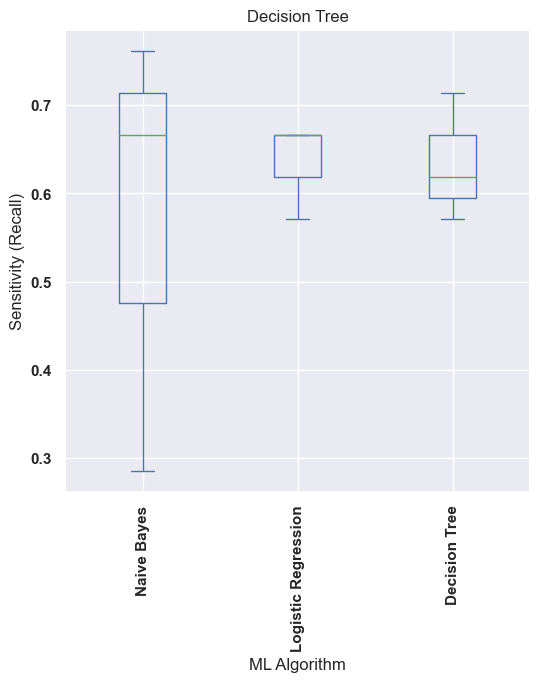

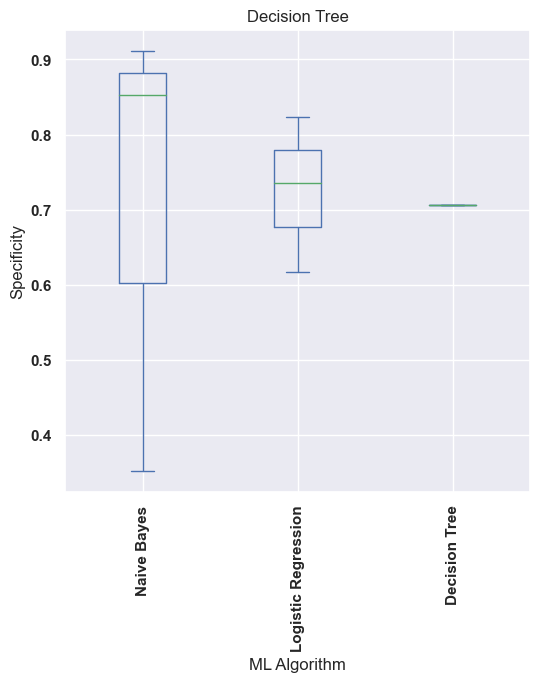

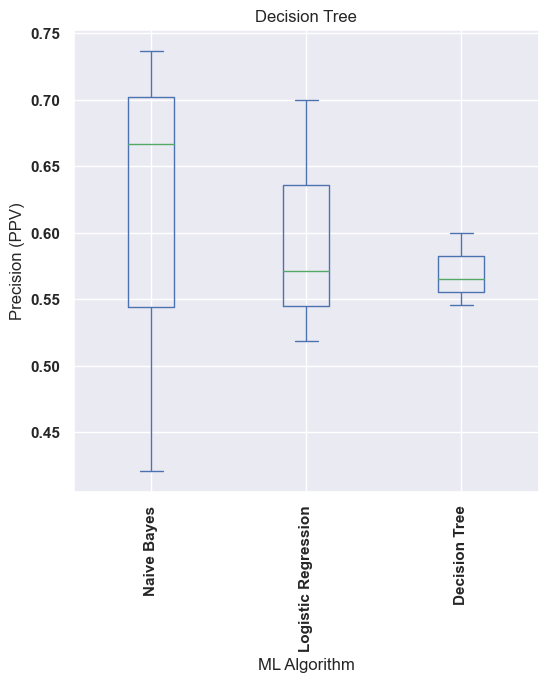

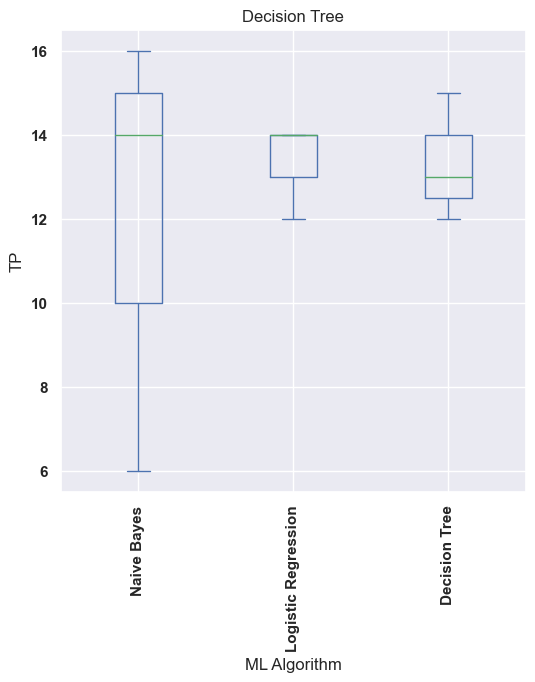

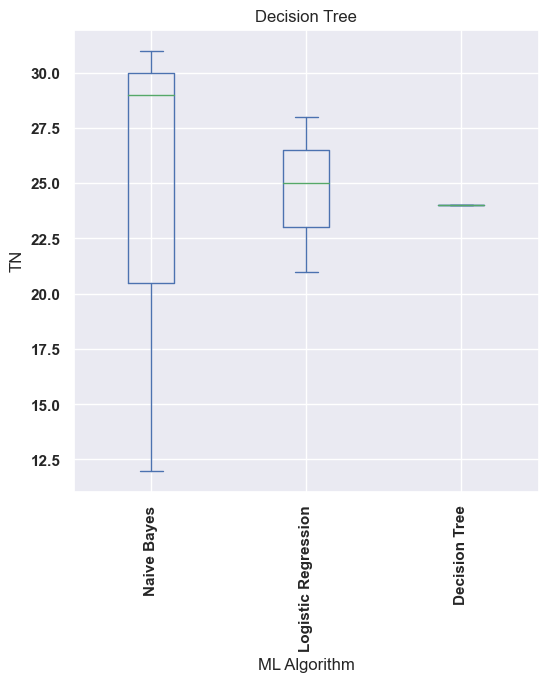

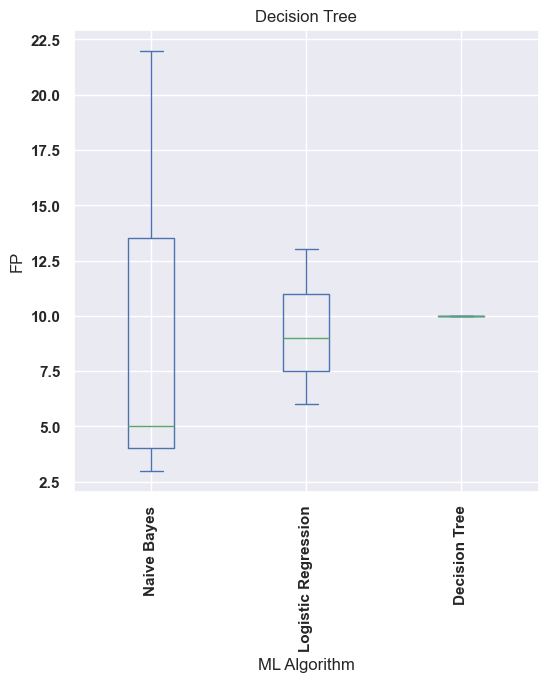

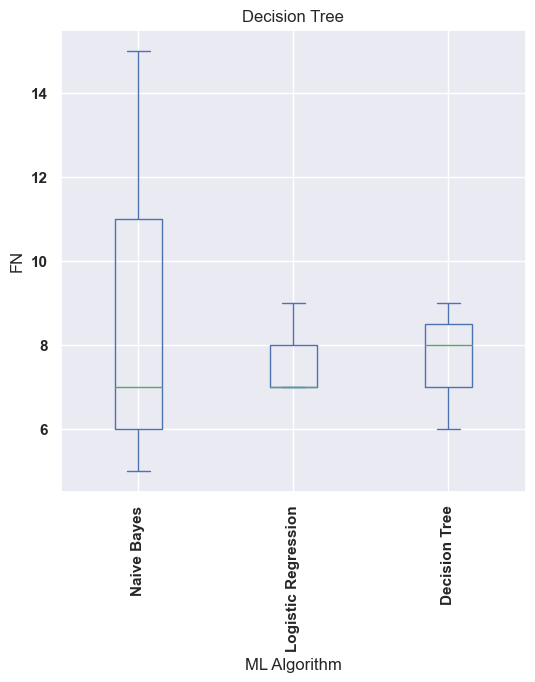

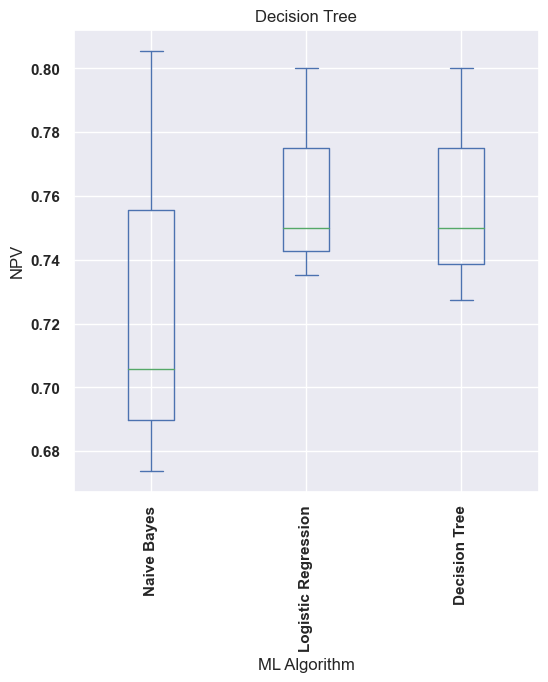

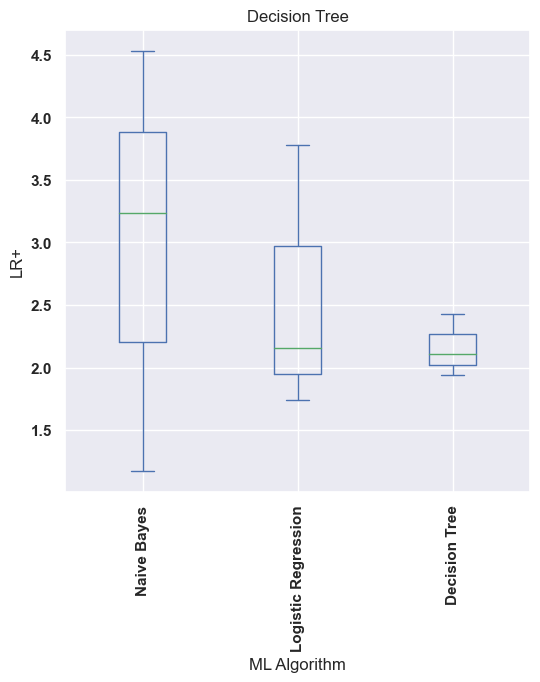

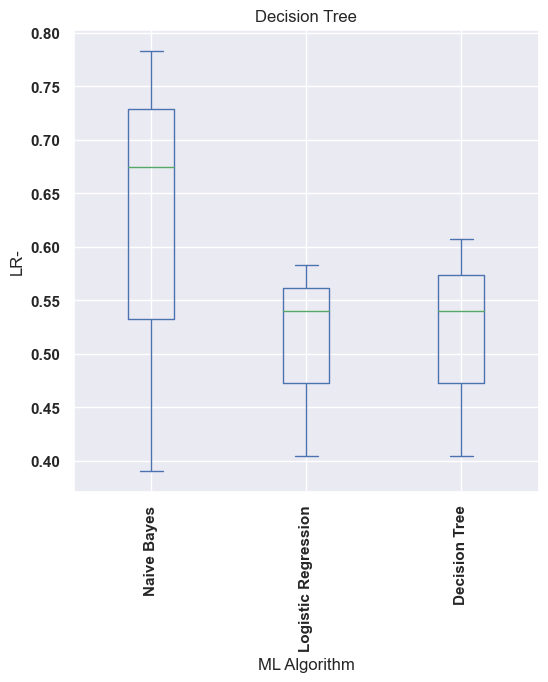

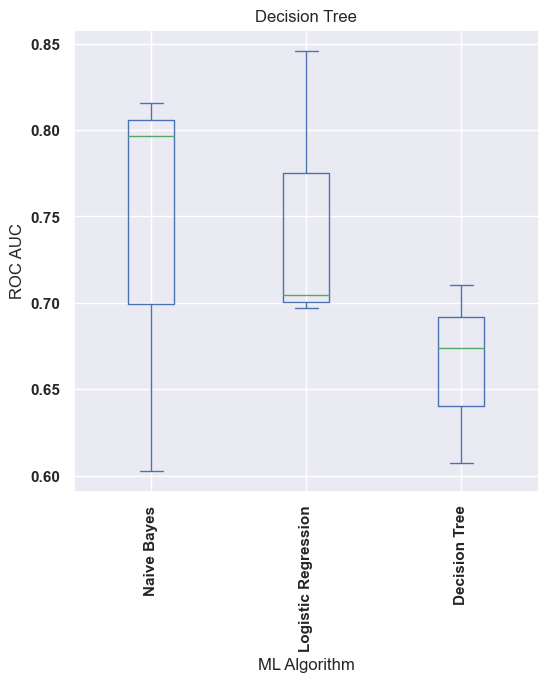

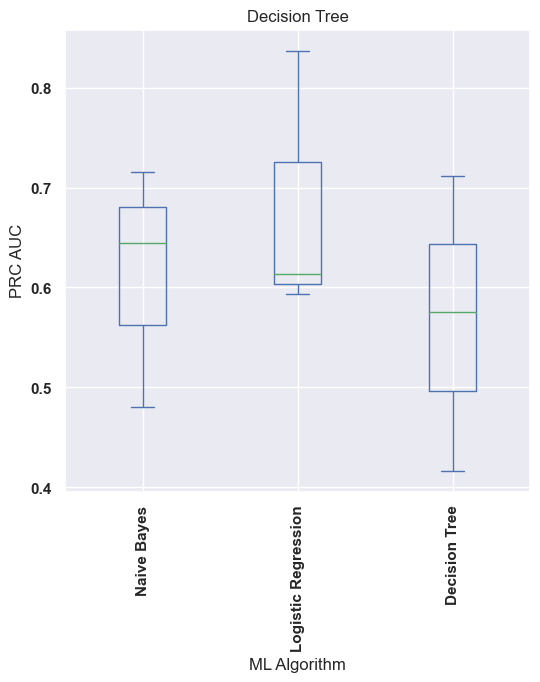

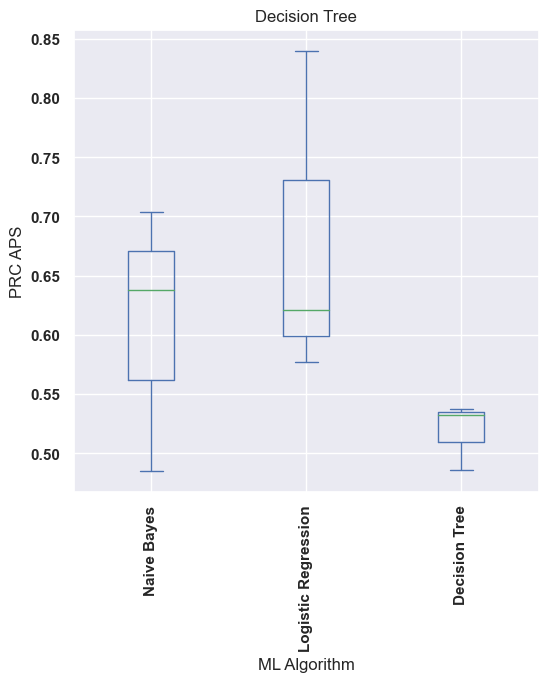

INFO: Running Non-Parametric Statistical Significance Analysis...
INFO: Preparing for Model Feature Importance Plotting...
INFO: Generating Feature Importance Boxplot and Histograms...


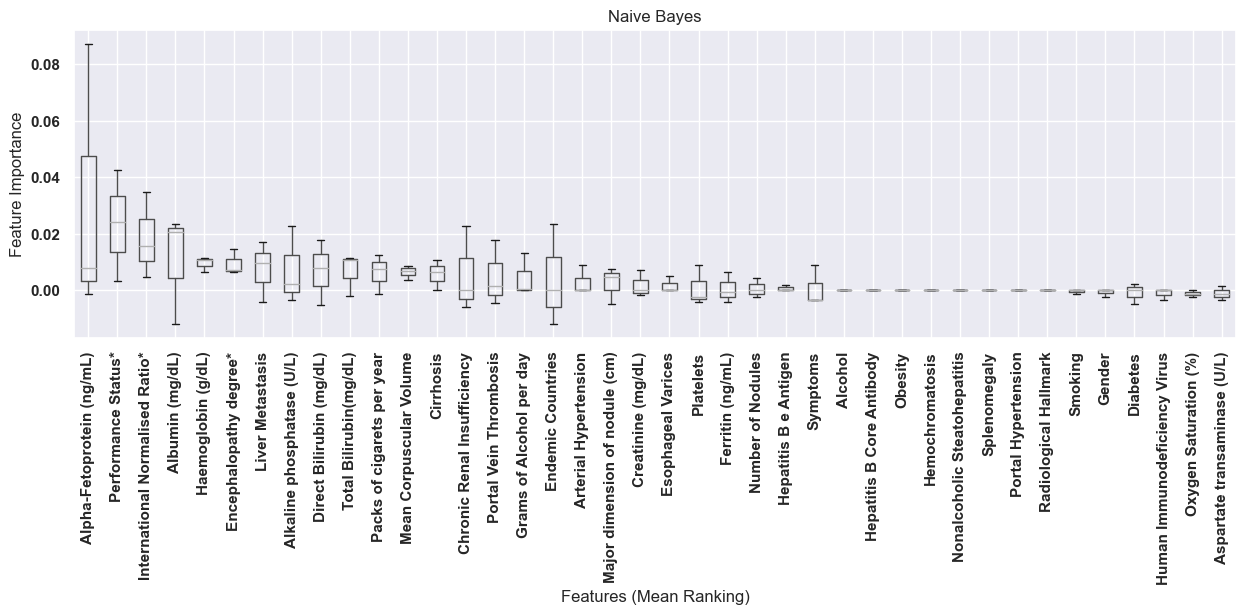

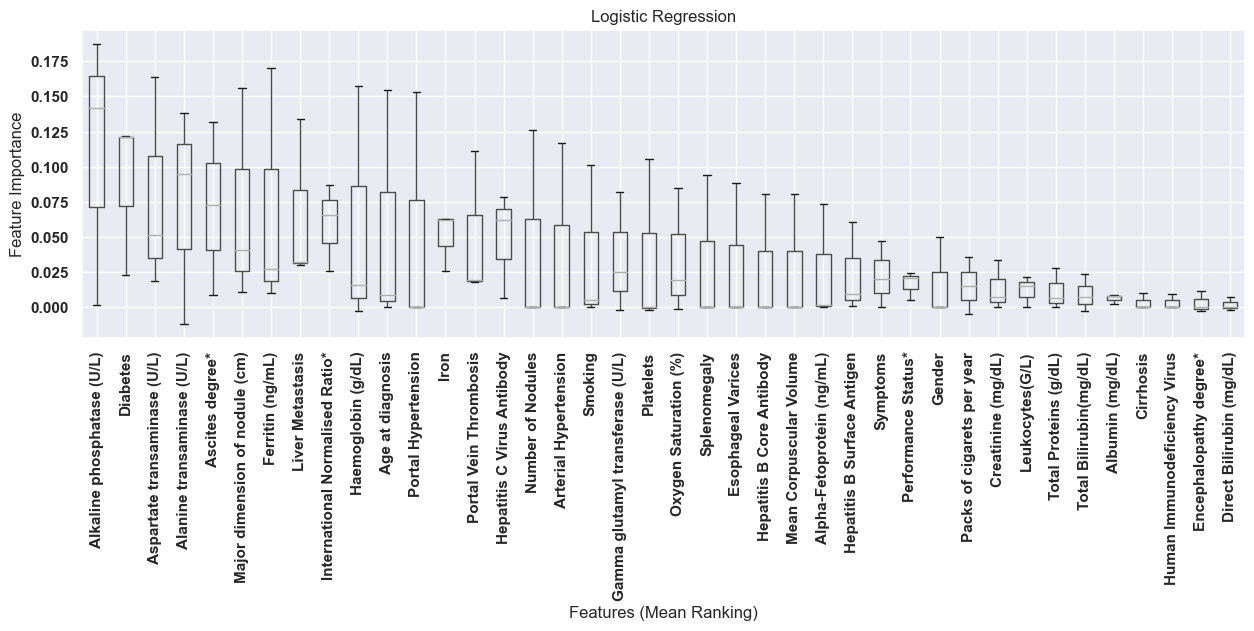

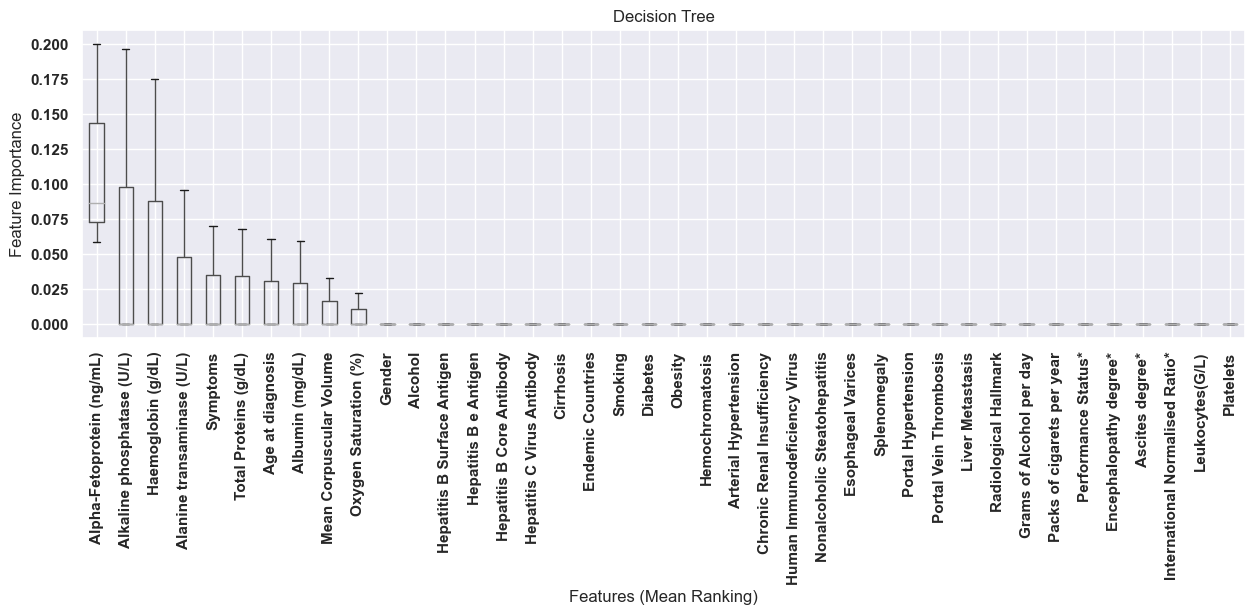

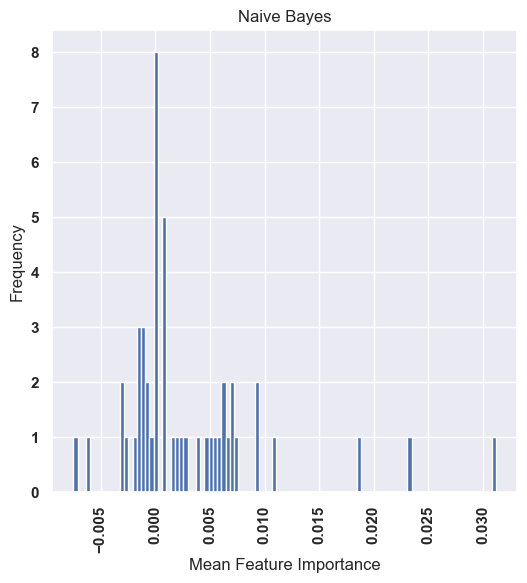

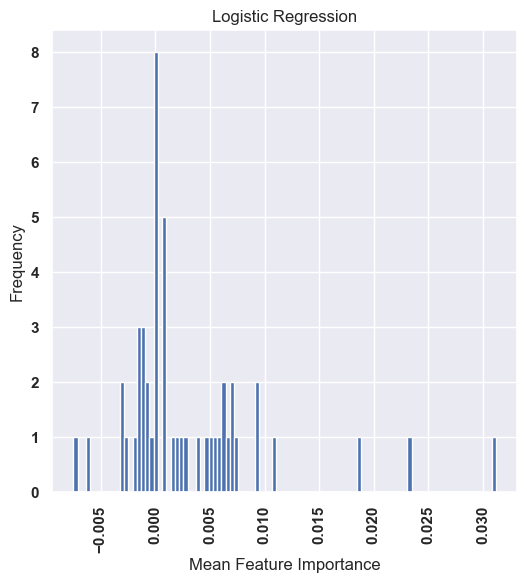

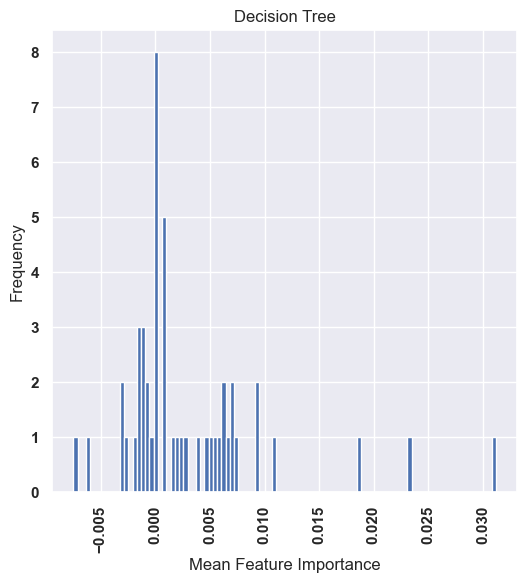

INFO: Generating Composite Feature Importance Plots...


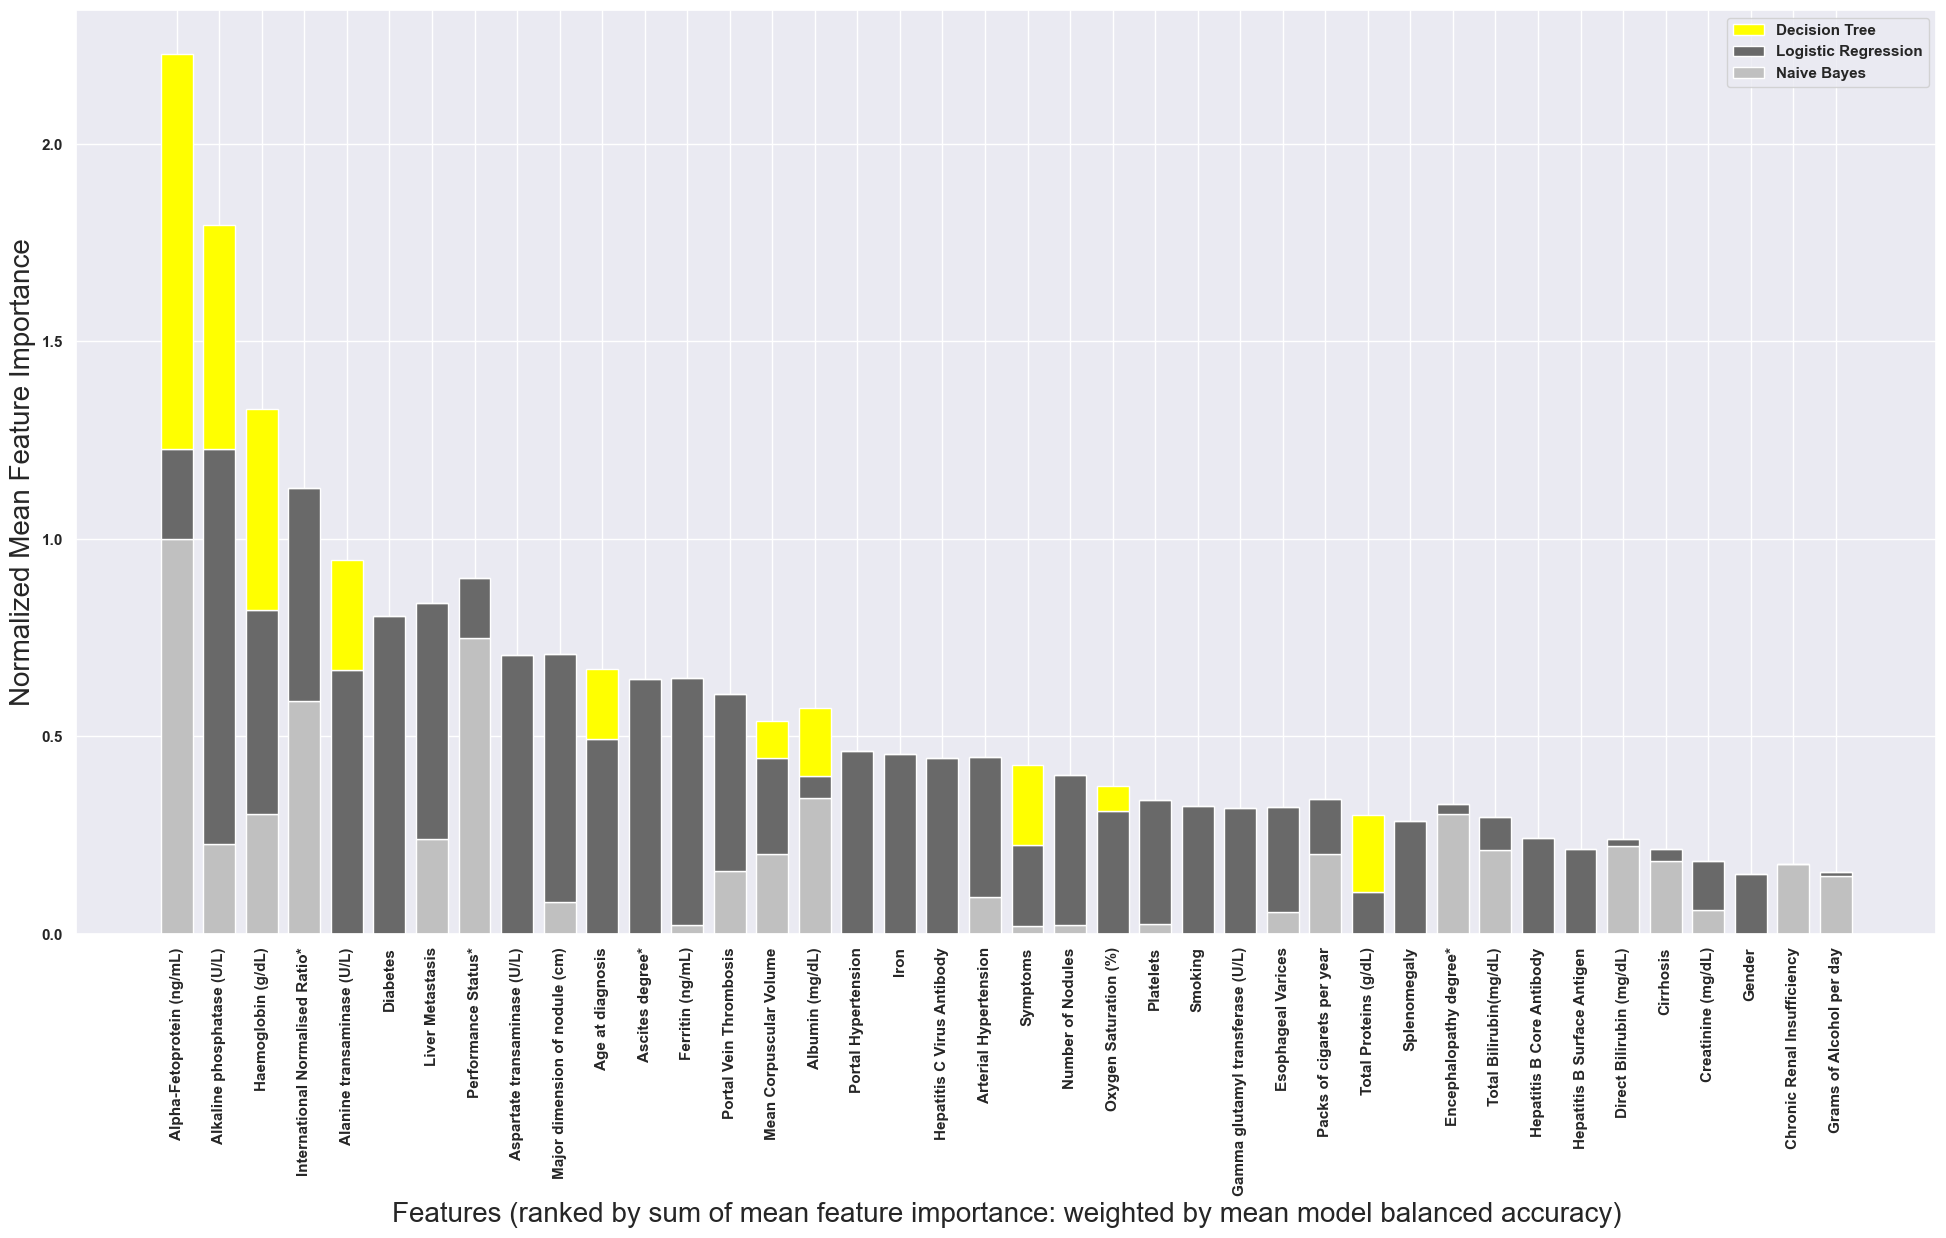

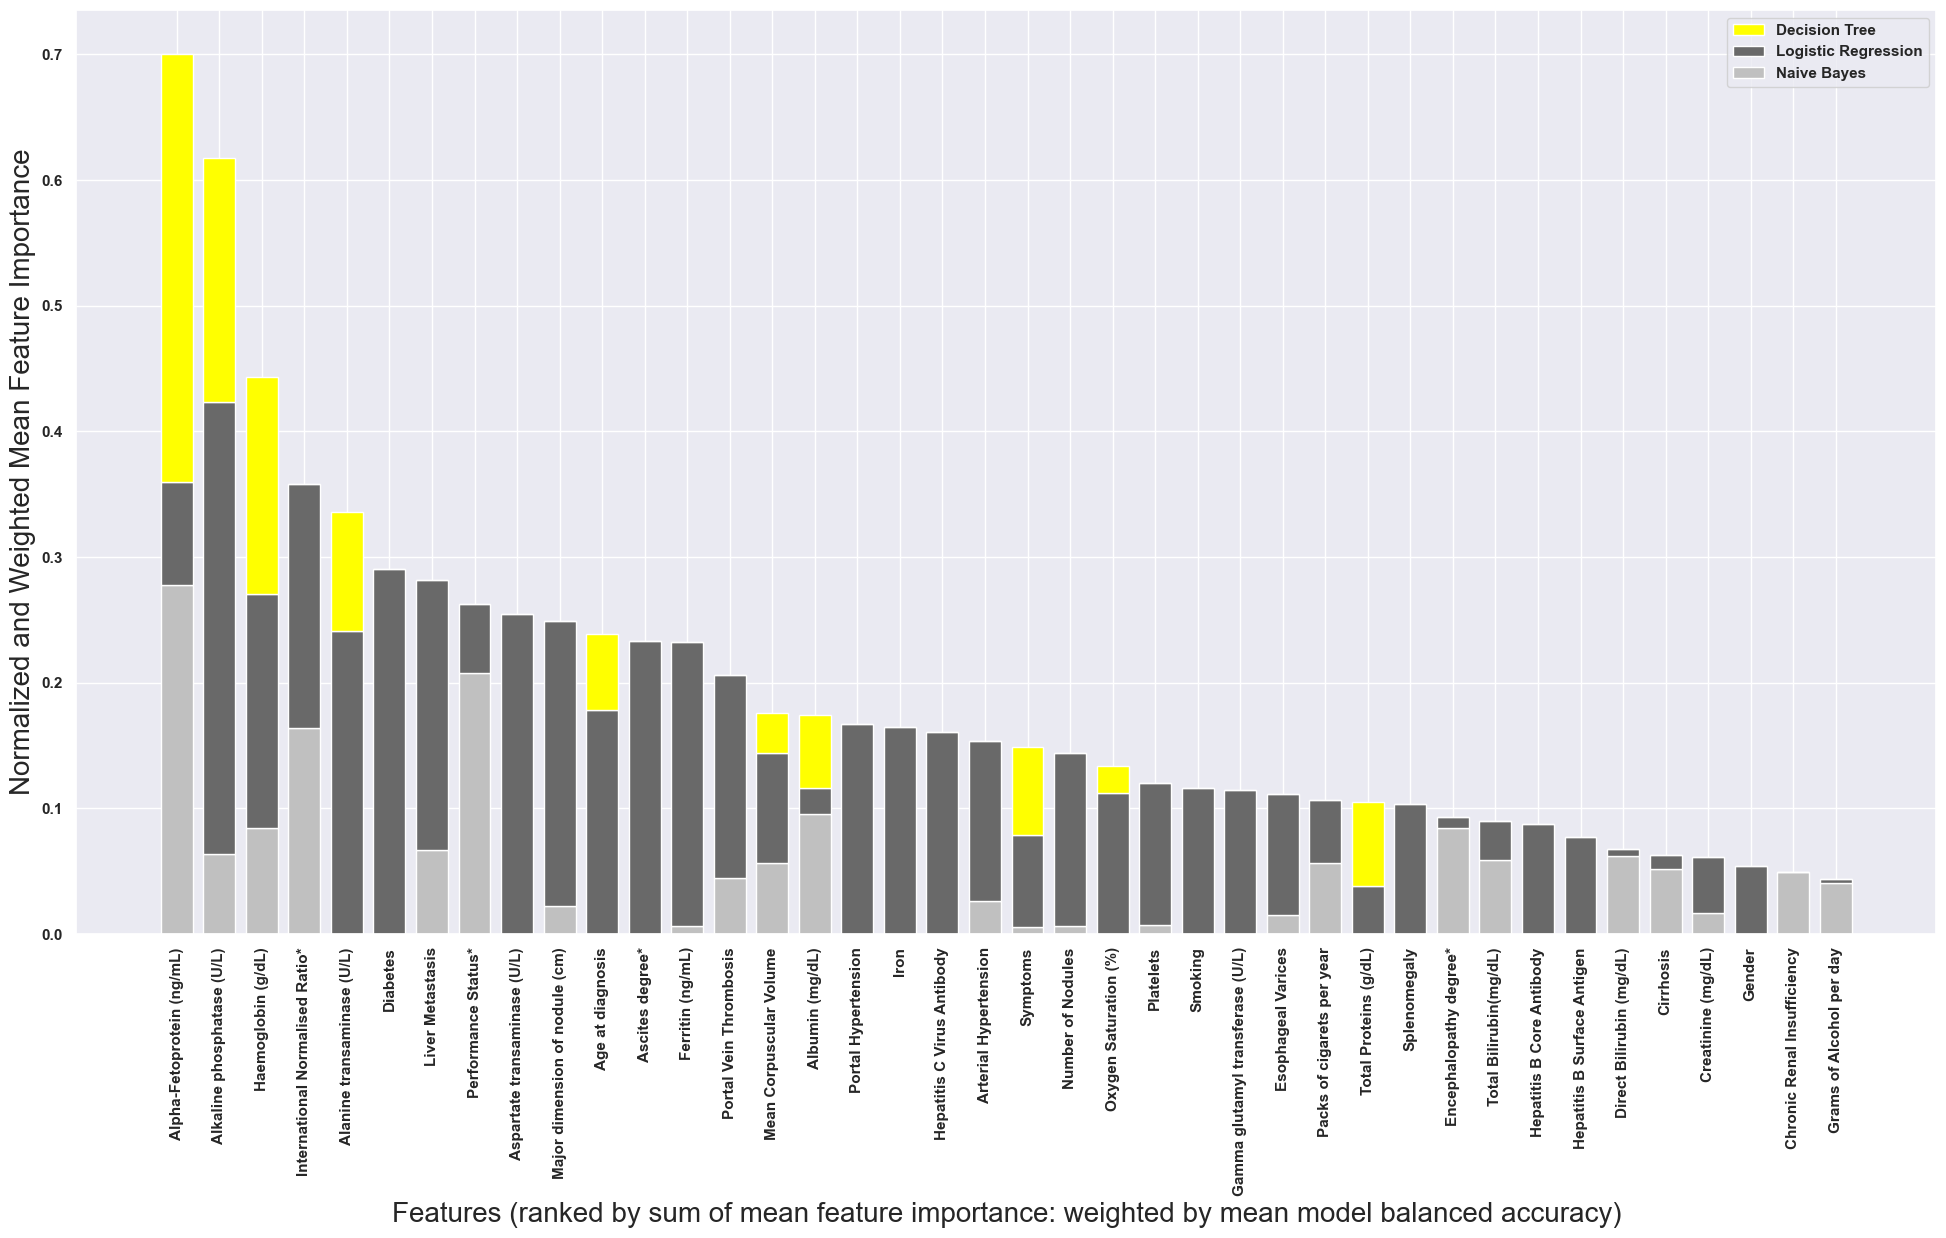

INFO: hcc_data phase 5 complete


In [22]:
from streamline.runners.stats_runner import StatsRunner
stats = StatsRunner(output_path, experiment_name, 
                    algorithms=algorithms, exclude=exclude, 
                    class_label=class_label, instance_label=instance_label, 
                    scoring_metric=primary_metric,
                    top_features=top_model_fi_features, sig_cutoff=sig_cutoff, 
                    metric_weight=metric_weight, scale_data=scale_data,
                    exclude_plots=exclude_plots,
                    show_plots=True)
stats.run(run_parallel=False)

## Phase 7: Dataset Comparison 
* Optional: Used only if > 1 dataset was analyzed

Assuming STREAMLINE was run on more than 1 dataset. After cell runs, for each evaluation metric you will see:
* Boxplots (for each metric) showing the distribution of median CV model performance (one data point for each algorithm) within a single sub-boxplot, run for each target dataset
  * Lines between boxplots show how the median ML algorithm performance changed from one dataset to the next
* Boxplots (for each algorithm and either ROC-AUC or PRC-AUC) showing the distribution of CV model performances within a single sub-boxplot, for each target dataset 

In [23]:
# Function to check target data folder for more than one dataset
def len_datasets(output_path, experiment_name):
    datasets = os.listdir(output_path + '/' + experiment_name)
    remove_list = ['.DS_Store', 'metadata.pickle', 'metadata.csv', 'algInfo.pickle',
                   'jobsCompleted', 'logs', 'jobs', 'DatasetComparisons', 'UsefulNotebooks',
                   experiment_name + '_ML_Pipeline_Report.pdf']
    for text in remove_list:
        if text in datasets:
            datasets.remove(text)
    return len(datasets)

INFO: Running Statistical Significance Comparisons Between Multiple Datasets...
INFO: Generate Boxplots Comparing Dataset Performance...


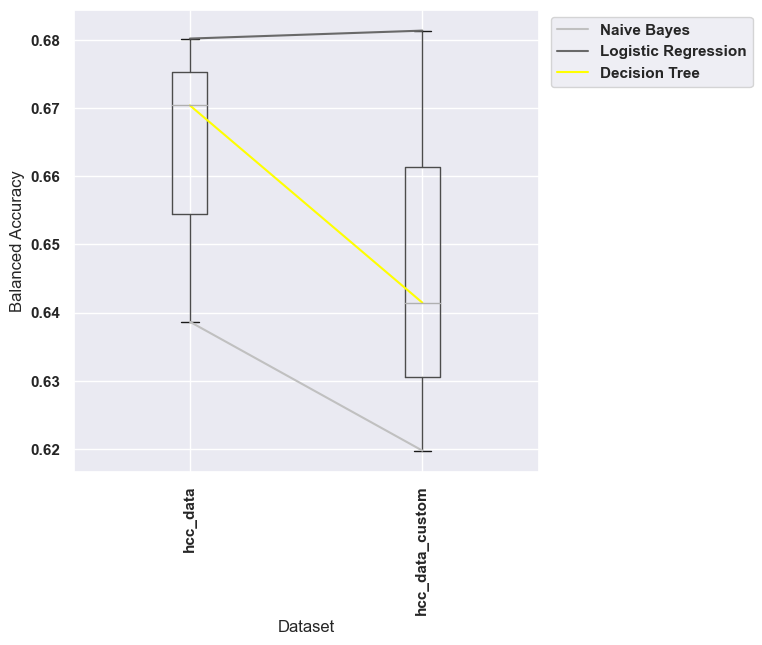

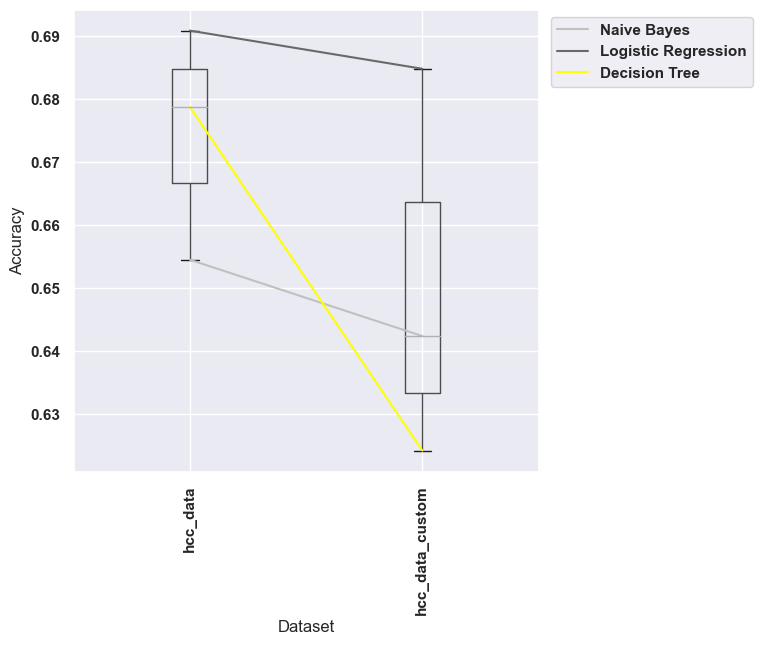

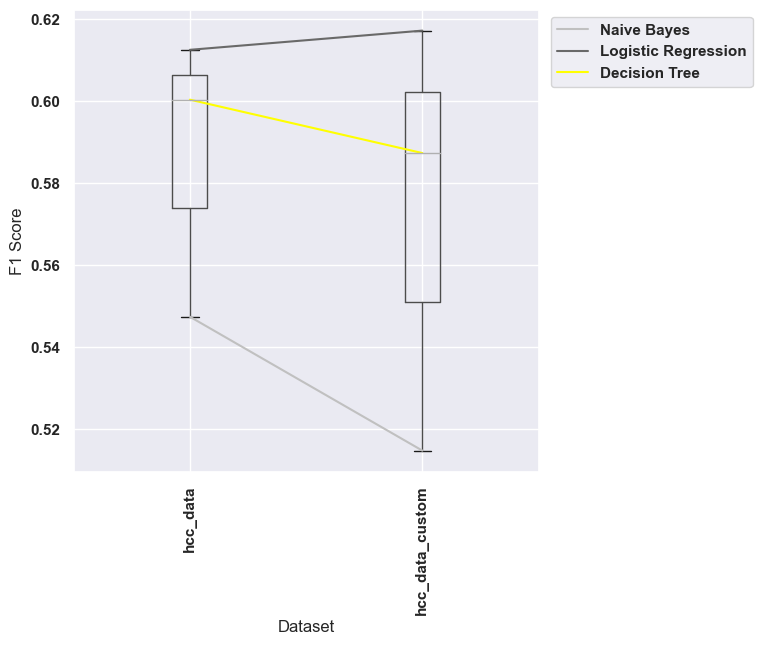

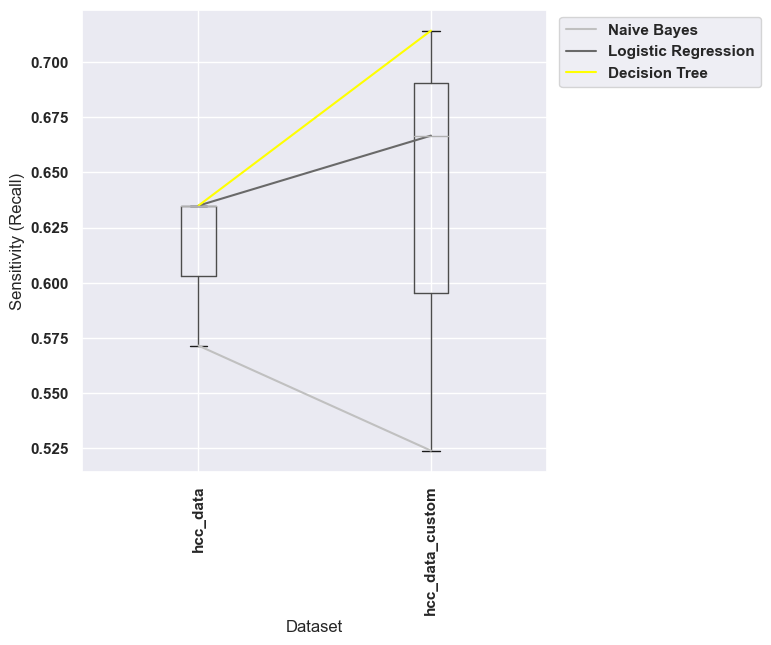

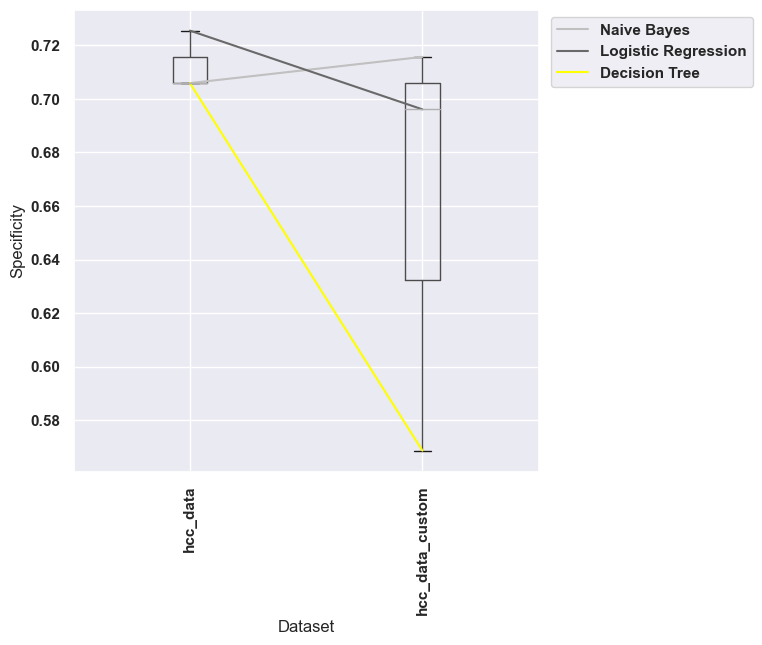

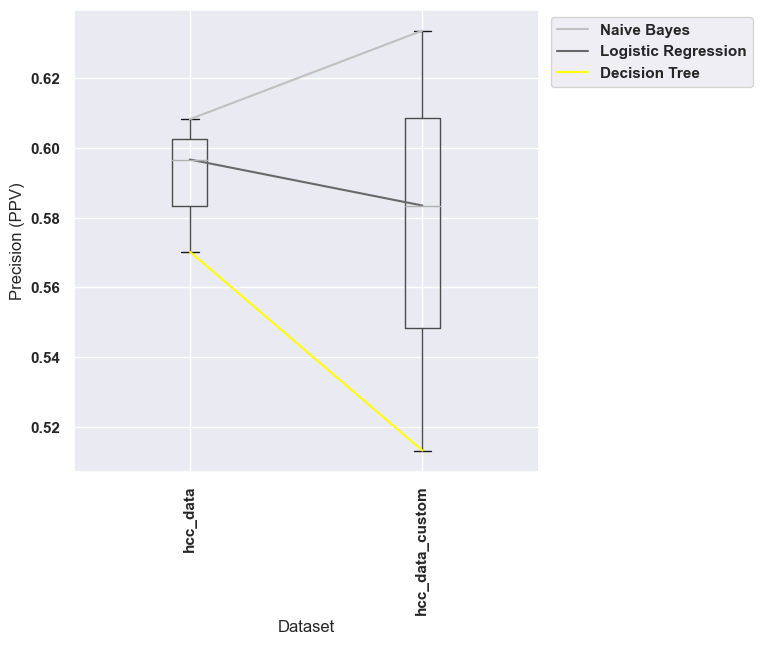

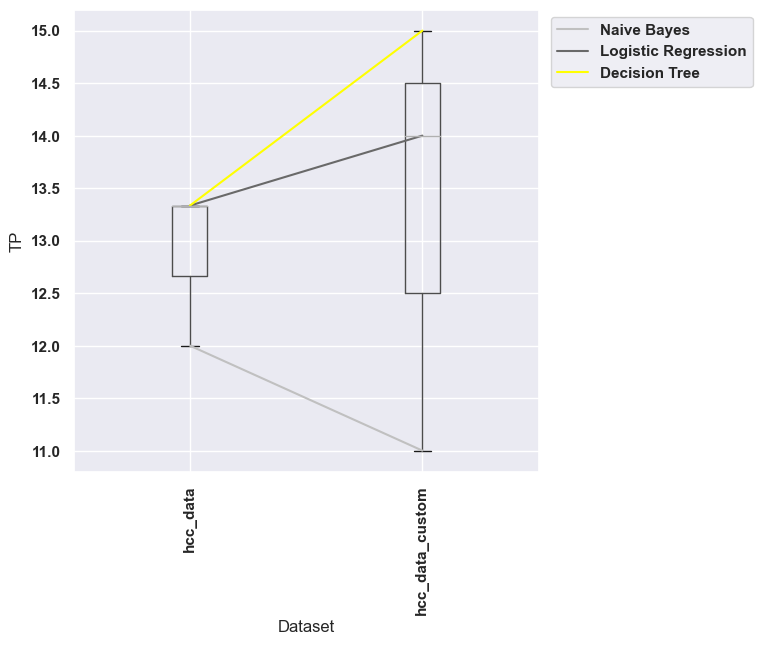

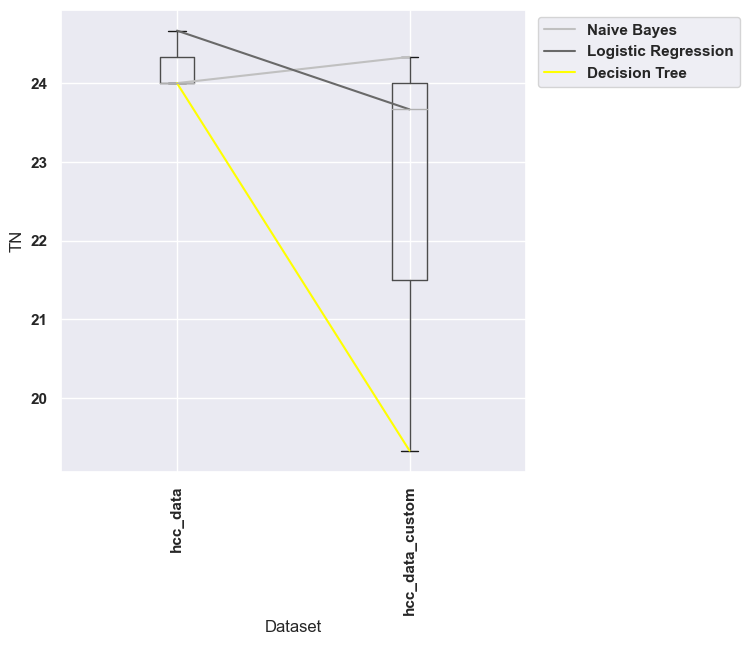

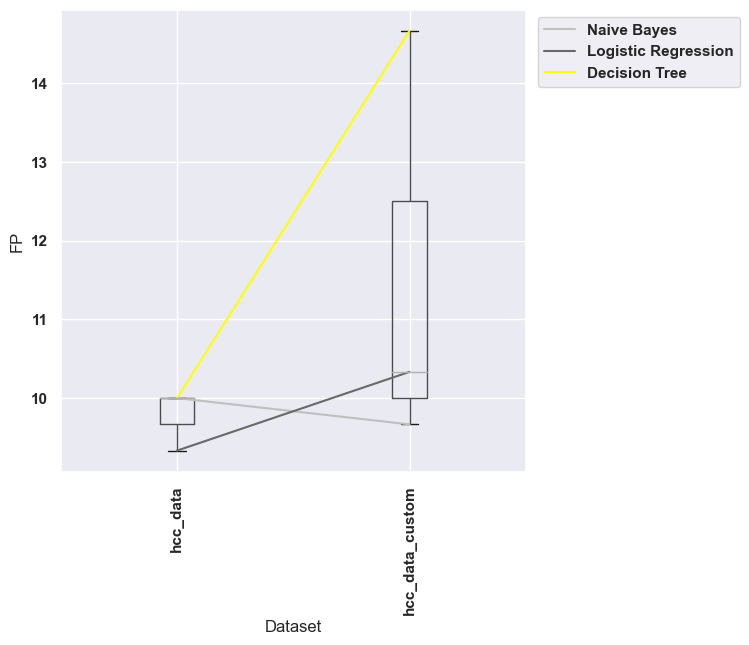

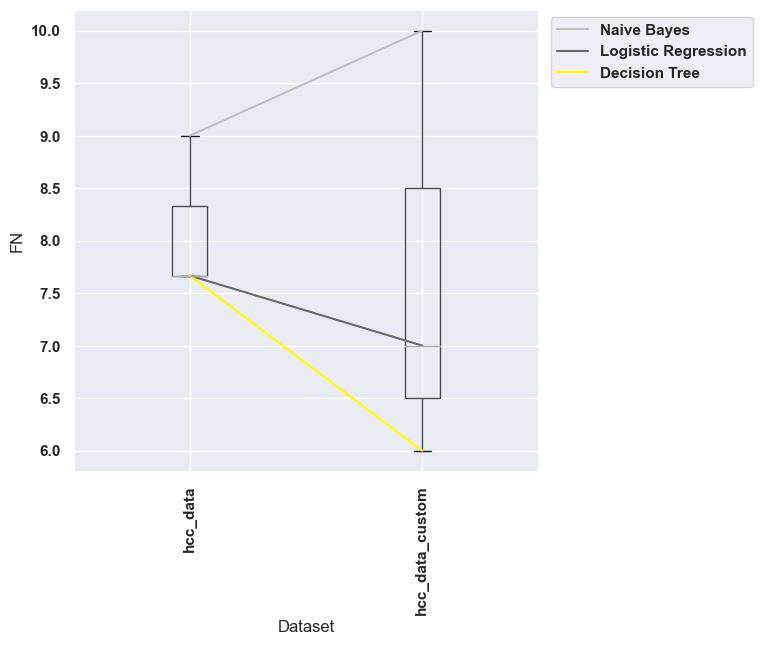

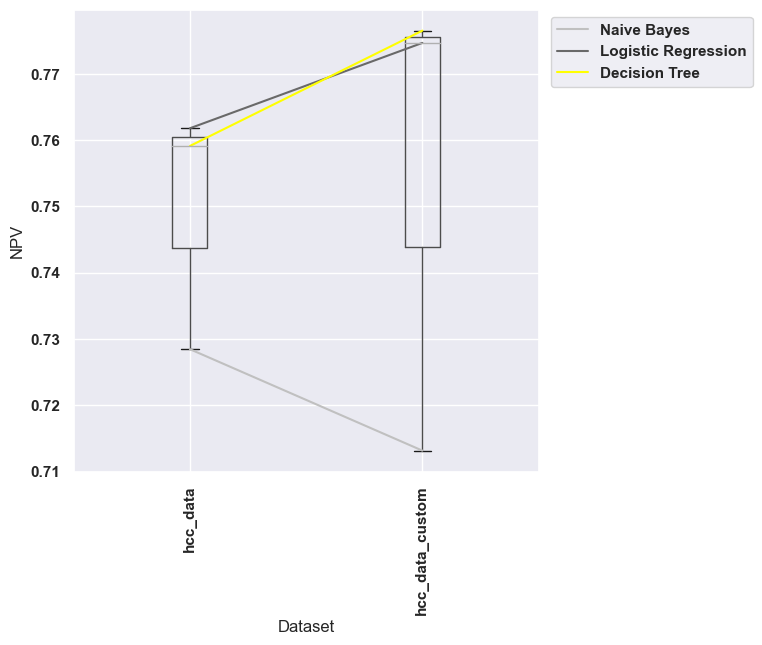

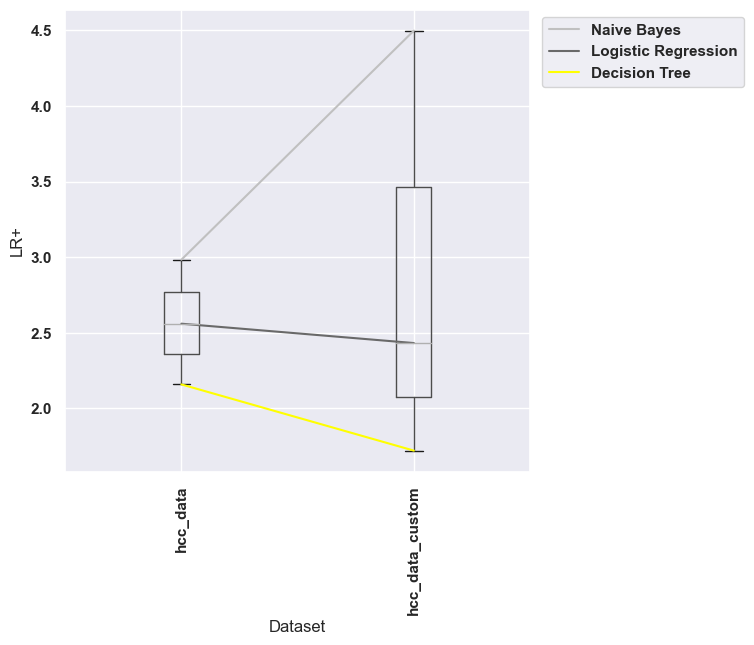

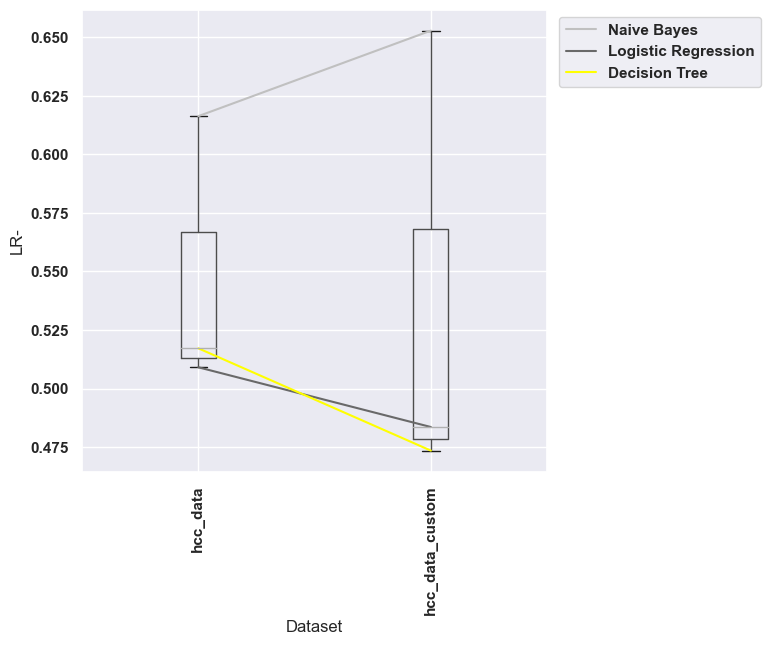

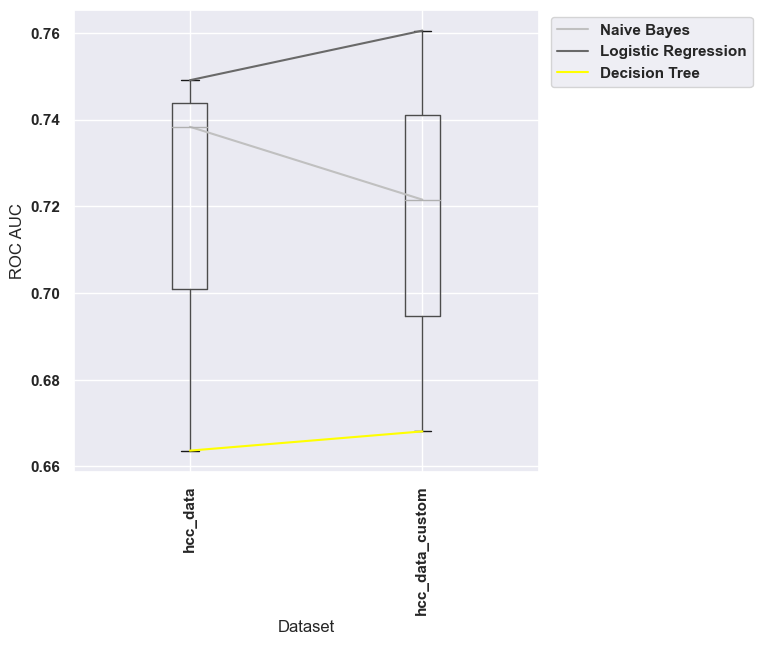

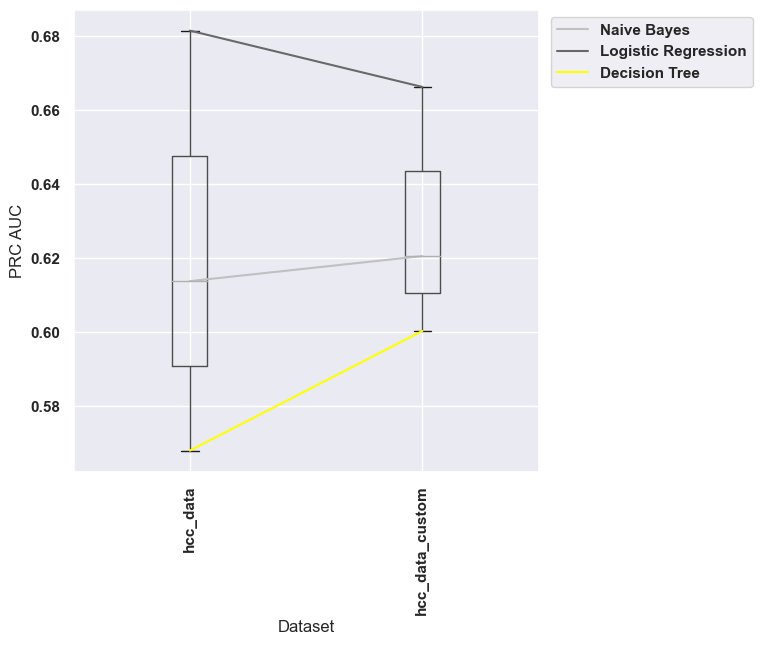

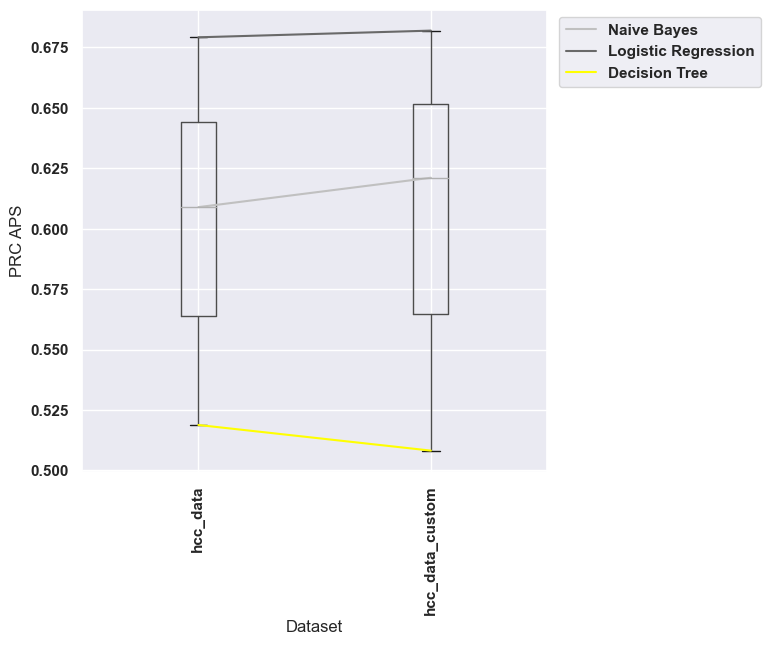

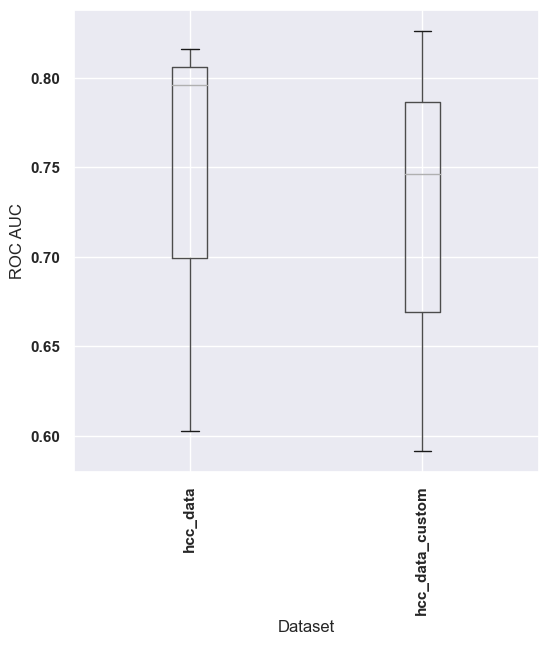

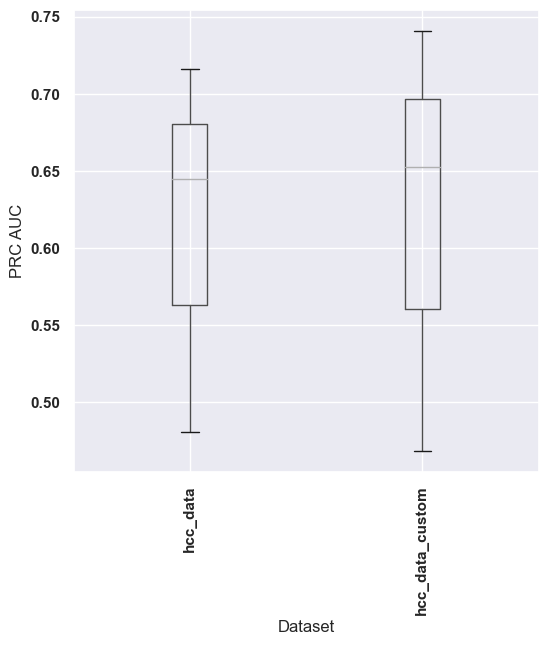

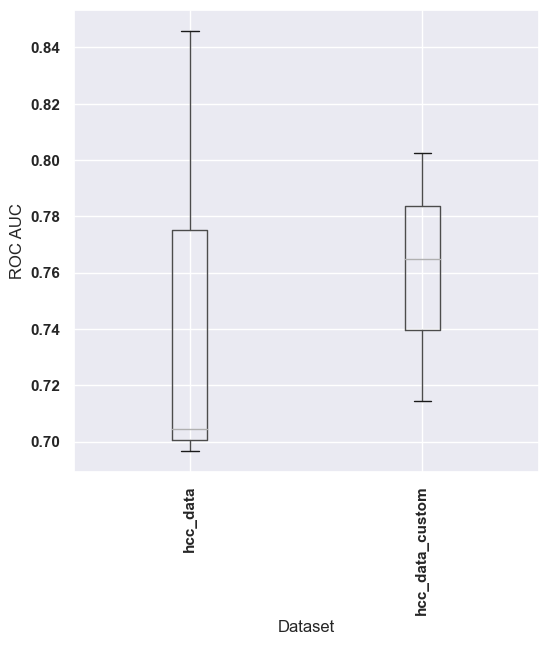

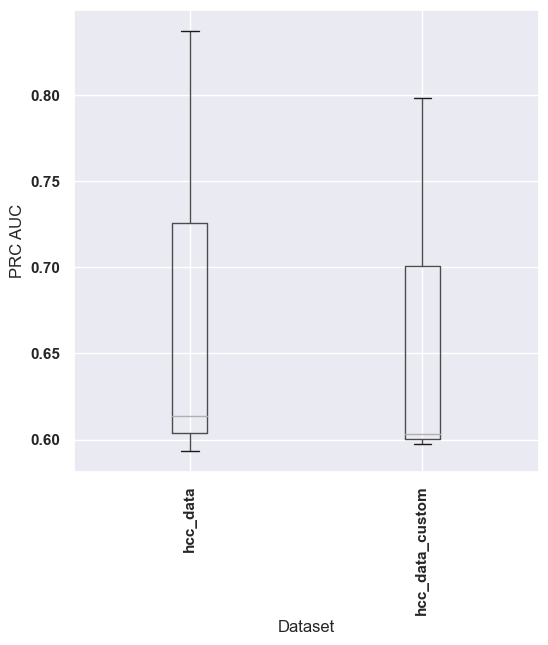

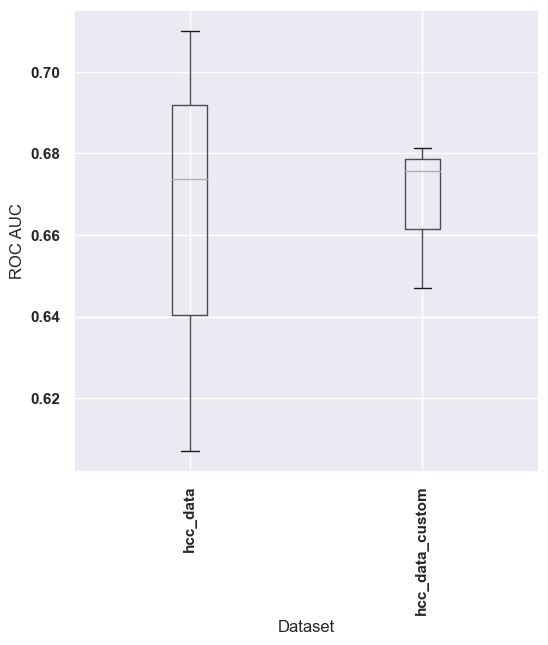

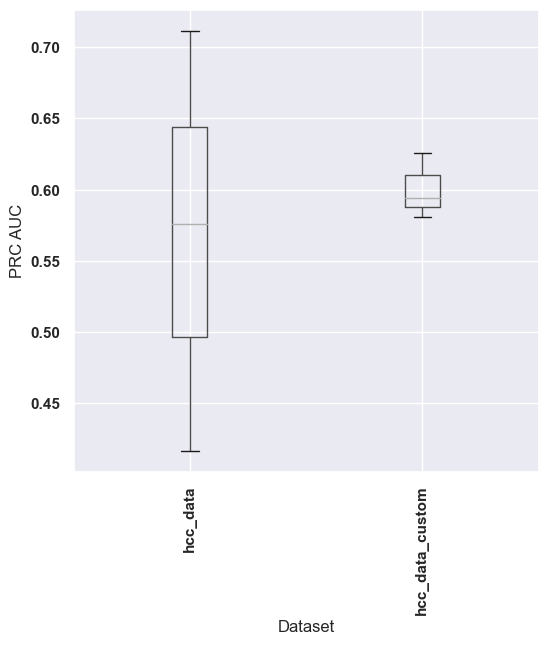

INFO: Phase 7 complete


In [24]:
from streamline.runners.compare_runner import CompareRunner
if len_datasets(output_path, experiment_name) > 1:
    cmp = CompareRunner(output_path, experiment_name, algorithms=algorithms,
                        exclude=exclude, sig_cutoff=sig_cutoff,
                        class_label=class_label, instance_label=instance_label,
                        show_plots=True)
    cmp.run(run_parallel=False)

## Phase 8: Replication
* Optional - depends on availability of replication data

In [25]:
if applyToReplication:
    from streamline.runners.replicate_runner import ReplicationRunner
    repl = ReplicationRunner(rep_data_path, dataset_for_rep, output_path, 
                             experiment_name, load_algo=True, 
                             exclude_plots=exclude_rep_plots)
    repl.run(run_parallel=False)

INFO: ------------------------------------------------------- 
INFO: Loading Dataset: hcc_data_custom_rep
INFO: ------------------------------------------------------- 
INFO: Loading Dataset: hcc_data_custom
INFO: Validating and Identifying Feature Types...
INFO: Initial Data Counts: ----------------
INFO: Instance Count = 171
INFO: Feature Count = 61
INFO:     Categorical  = 28
INFO:     Quantitative = 33
INFO: Missing Count = 1181
INFO:     Missing Percent = 0.11322020899242642
INFO: Class Counts: ----------------
INFO: Class Count Information
INFO: 
   Class  Instances
0      0        115
1      1         56
INFO: Processed Data Counts: ----------------
INFO: Instance Count = 171
INFO: Feature Count = 69
INFO:     Categorical  = 40
INFO:     Quantitative = 29
INFO: Missing Count = 942
INFO:     Missing Percent = 0.0798372743452835
INFO: Class Counts: ----------------
INFO: Class Count Information
INFO: 
   Class  Instances
0      0        115
1      1         56
INFO: Final List of 

hcc_data_custom_rep phase 9 complete


## Phase 9: Summary Report
* Optional
* Generates and downloads a PDF report of the analysis

### Testing Data Report
* Summarizes testing evaluations on all trained models, applied to their respective hold out testing data partitions

In [26]:
from streamline.runners.report_runner import ReportRunner
rep = ReportRunner(output_path, experiment_name, 
                   algorithms=algorithms, exclude=exclude)
rep.run(run_parallel=False)

INFO: Starting Report
INFO: Publishing Univariate Analysis
INFO: Publishing Model Prediction Summary
INFO: Publishing Average Model Prediction Statistics
INFO: Publishing Median Model Prediction Statistics
INFO: Publishing Feature Importance Summaries
INFO: Publishing Dataset Comparison Boxplots
INFO: Publishing Statistical Analysis
INFO: Publishing Runtime Summary
INFO: Phase 8 complete


### Replication Data Report
Summarizes performance of all trained models when applied to the same replication dataset. This evaluation offers a better way to pick a 'best performing' model, since all models are evaluated on the same set of new, or as-of-yet unseen, data.

In [27]:
if applyToReplication:
    from streamline.runners.report_runner import ReportRunner
    rep = ReportRunner(output_path=output_path, experiment_name=experiment_name,
                       algorithms=algorithms, exclude=exclude, training=False, 
                       rep_data_path=rep_data_path, 
                       dataset_for_rep=dataset_for_rep)
    rep.run(run_parallel=False)

INFO: Starting Report
INFO: Publishing Model Prediction Summary
INFO: Publishing Average Model Prediction Statistics
INFO: Publishing Median Model Prediction Statistics
INFO: Phase 10 complete


## File Cleanup 
* Optional

In [28]:
from streamline.runners.clean_runner import CleanRunner
clean = CleanRunner(output_path, experiment_name, del_time=del_time, del_old_cv=del_old_cv)
# run_parallel is not used in clean
clean.run()